<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_CORE_WEEK13/blob/main/Week_13_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ad Click Analysis

## Overview
**i. Understanding the context**  
Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups 

**ii. Specifying the objectives**  
The specific objective of this project is:  
> To perform explorarory data analysis so as to learn the characteristics of the customer groups  
> To build  models that would cluster the different customer groups

**iii. Defining the metric for success**  
The project will be considered successful when we build clustering models with high precision in clustering the different customer groups   

**iv. Data relevance**  
A data set containing data on the Kira Plastinina's website visitors was retreived from http://bit.ly/EcommerceCustomersDataset. The following is the description of the data set  
  

* The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
* "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
* The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
* The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
* The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
* The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

**v. Project design**  
In order to work on the above problem, we need to do the following:

a. Acquire the dataset with appropriate data for our project  
b. Perform data cleaning by dropping irrelevant data, finding and dealing with duplicates, missing data, and anomalies   
c. Perform univariate and bivariate analysis to gain insights on the given data  
d. Build a esupervised learning model  
e. Give conclusions and recommendations

## Loading relevant packages

In [ ]:
library("data.table")
library("tidyverse")
devtools::install_github("moodymudskipper/cutr")
library(cutr)
devtools::install_github("paulponcet/modeest")
library(modeest)
install.packages('moments')
library(moments)
install.packages('janitor')
library(janitor)
install.packages("ggcorrplot")
library(ggcorrplot)
install.packages("factoextra") 
library(factoextra)
install.packages("NbClust")
library(NbClust)


## Loading the dataset

In [6]:
# load the dataset using fread() funcion and instantiate it
data <- fread('http://bit.ly/EcommerceCustomersDataset')

## Reading the data

In [7]:
# preview the first few records in the dataset
head(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [8]:
# find number of rows and columns in the dataframe using dim() function
dim(data)

[1] 12330    18

There are 12330 rows and 18 columns in the dataframe

In [9]:
# check the data type of each variable using sapply() function
sapply(data, class)

Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"             "character"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
            "character"               "logical"               "logical"

"OperatingSystems', 'Browser', 'Region', and 'traffictype' are categorical variables even though they have numeric values. Their data types will be changed in the data cleaning section. 

## Data cleaning

In [10]:
# lower the case of the column names using tolower() function for standardization
names(data) <- tolower(names(data))

# display the column names to confirm the changes
colnames(data)

[1] "administrative"          "administrative_duration"
 [3] "informational"           "informational_duration" 
 [5] "productrelated"          "productrelated_duration"
 [7] "bouncerates"             "exitrates"              
 [9] "pagevalues"              "specialday"             
[11] "month"                   "operatingsystems"       
[13] "browser"                 "region"                 
[15] "traffictype"             "visitortype"            
[17] "weekend"                 "revenue"

In [11]:
# find number of duplicated rows using anyDuplicated() function
anyDuplicated(data)

[1] 159

There are 159 duplicated rows

In [12]:
# drop the duplicated data
data<- data[!duplicated(data)]


In [13]:
# find the number of missing values in each column using is.na() and colSums() functions
colSums(is.na(data))

administrative administrative_duration           informational 
                     12                      12                      12 
 informational_duration          productrelated productrelated_duration 
                     12                      12                      12 
            bouncerates               exitrates              pagevalues 
                     12                      12                       0 
             specialday                   month        operatingsystems 
                      0                       0                       0 
                browser                  region             traffictype 
                      0                       0                       0 
            visitortype                 weekend                 revenue 
                      0                       0                       0

In [14]:
# drop the missing values
data <-  na.omit(data)


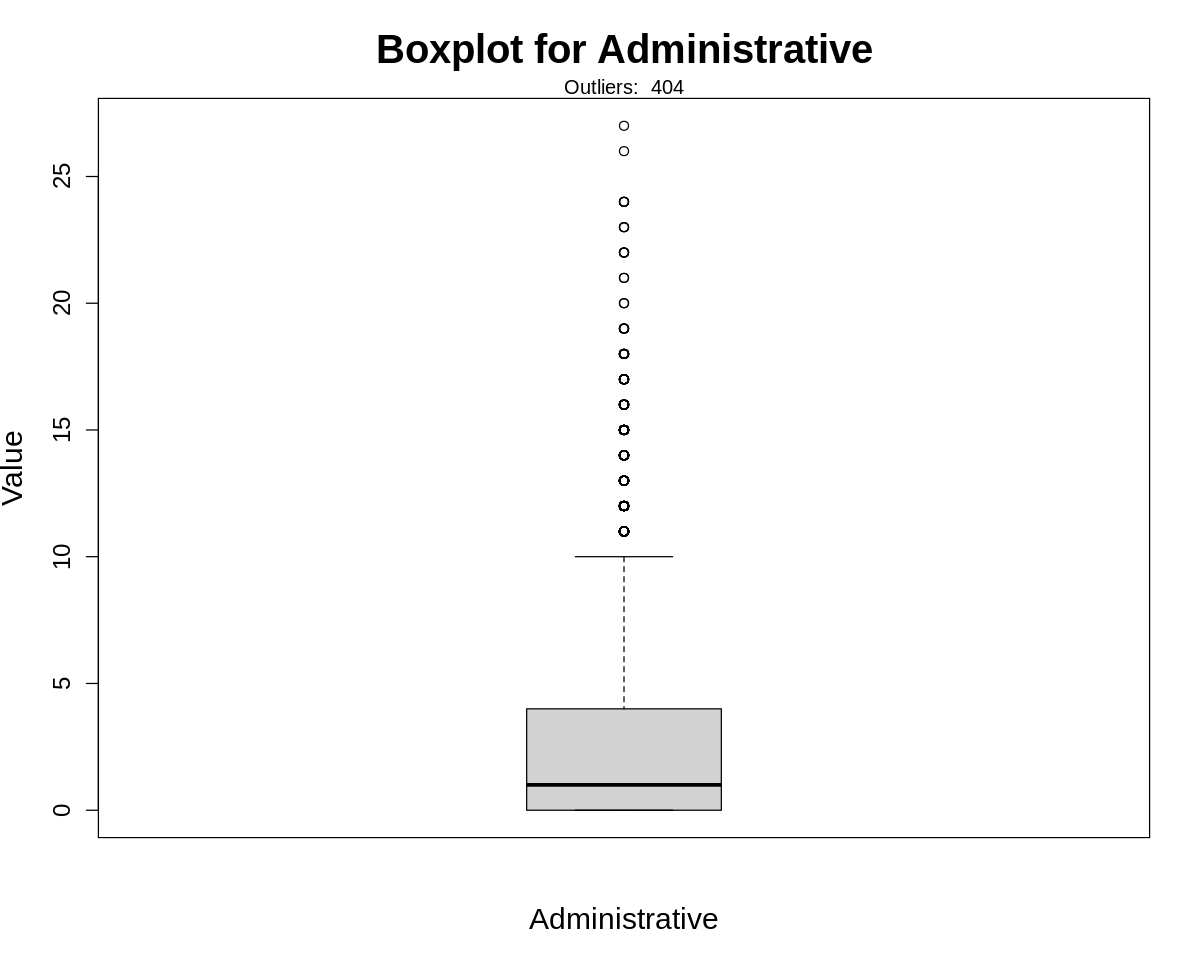

In [15]:
# plot a boxplot to check for outliers in the 'administrative' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$administrative, main="Boxplot for Administrative", xlab = "Administrative", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_administrative <- boxplot.stats(data$administrative)$out
mtext(paste("Outliers: ", paste(length(outlier_administrative), collapse=", ")), cex=1)

There are 404 outliers in the 'administrative' column

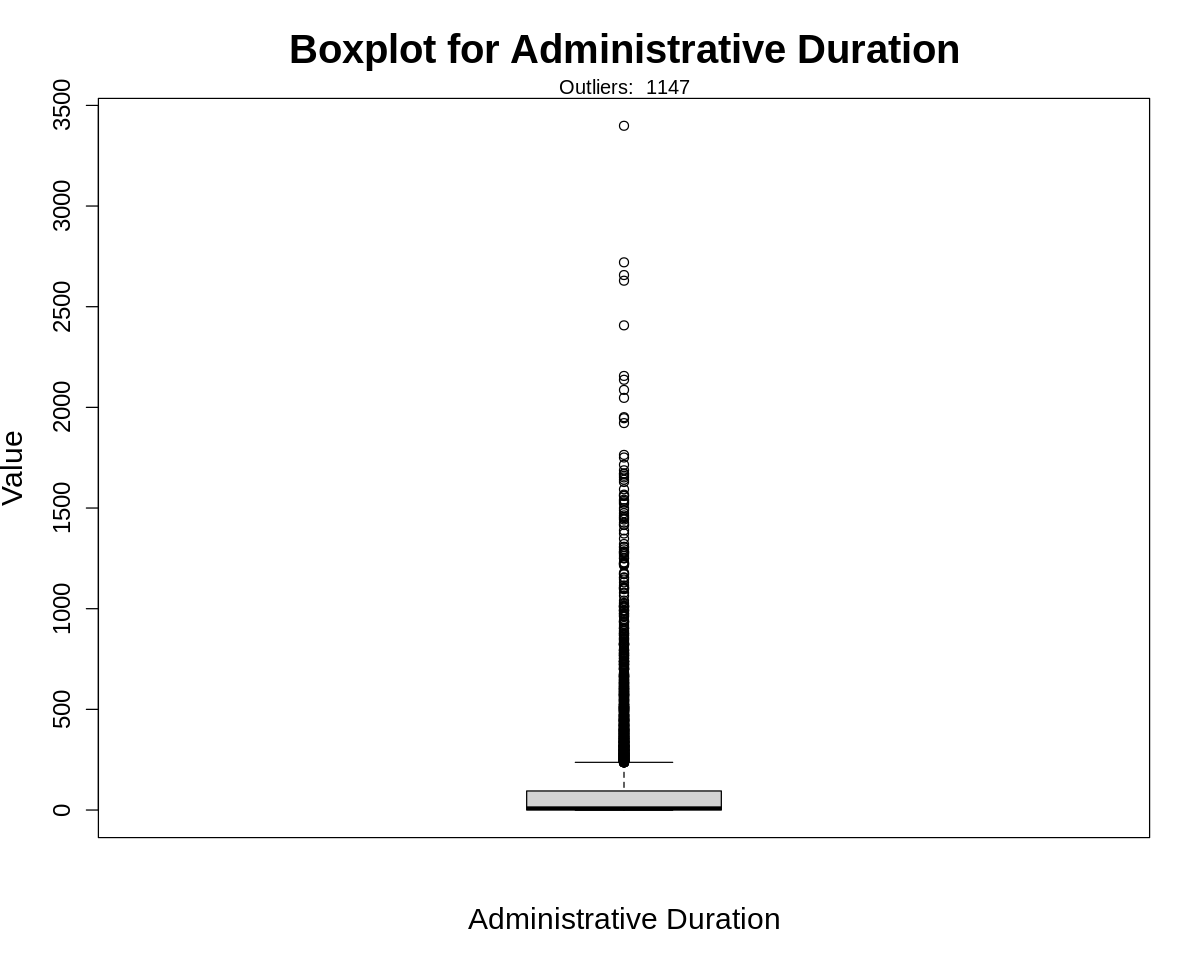

In [16]:
# plot a boxplot to check for outliers in the 'administrative_duration' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$administrative_duration, main="Boxplot for Administrative Duration", xlab = "Administrative Duration", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_administrative_duration <- boxplot.stats(data$administrative_duration)$out
mtext(paste("Outliers: ", paste(length(outlier_administrative_duration), collapse=", ")), cex=1)

There are 1147 outliers in the 'administrative_duration' column

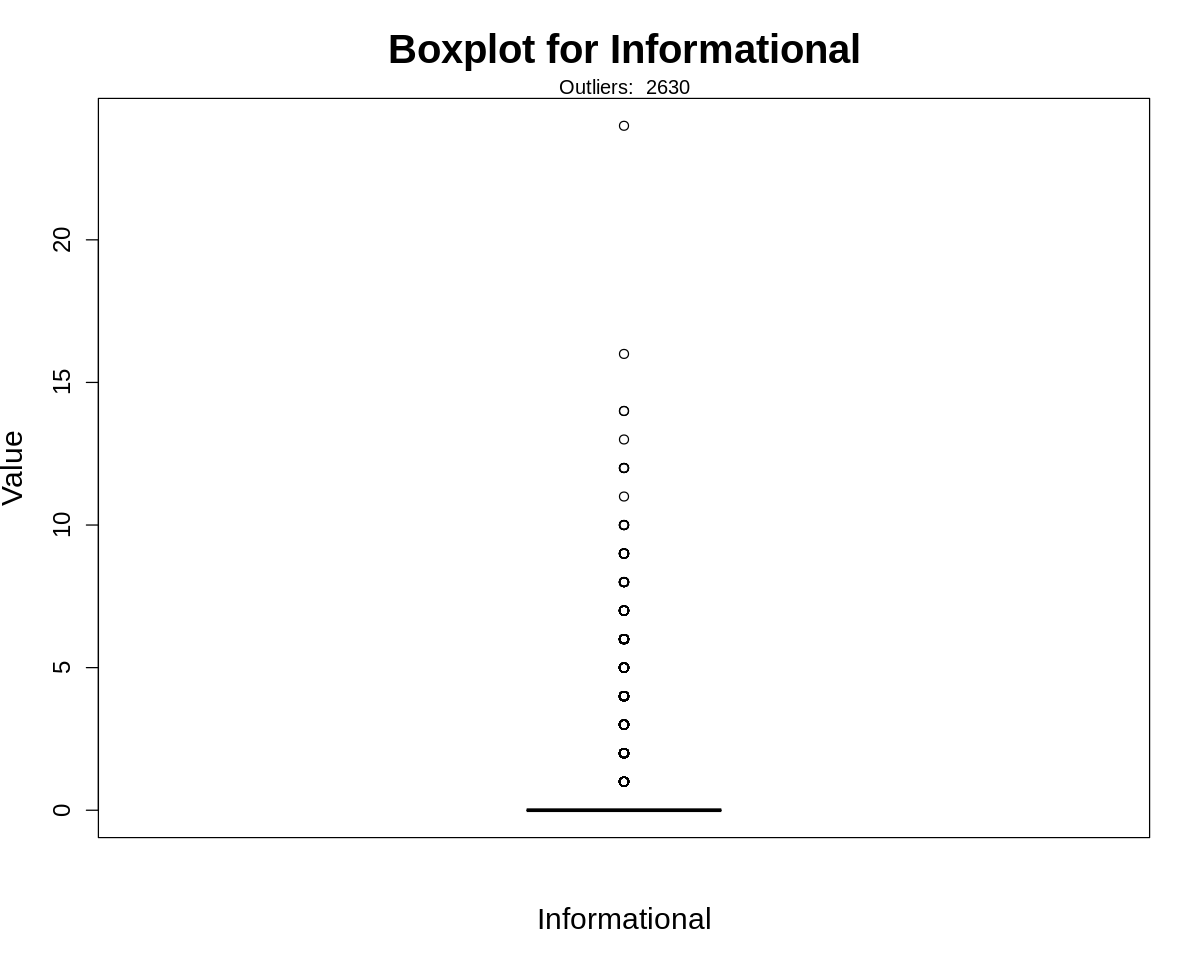

In [17]:
# plot a boxplot to check for outliers in the 'informational' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$informational, main="Boxplot for Informational", xlab = "Informational", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_informational <- boxplot.stats(data$informational)$out
mtext(paste("Outliers: ", paste(length(outlier_informational), collapse=", ")), cex=1)

There are 2630 outliers in the 'informational' column

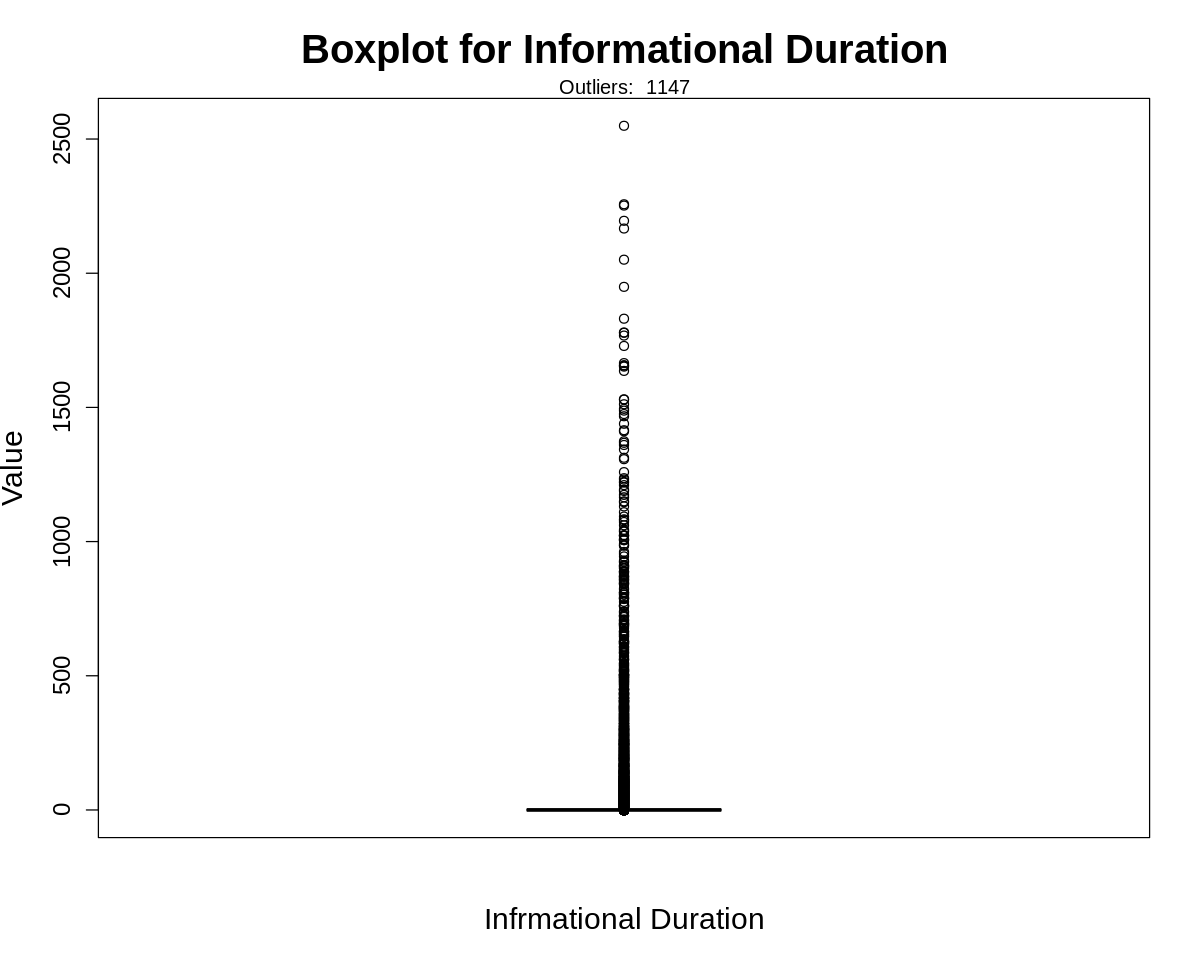

In [18]:
# plot a boxplot to check for outliers in the 'informational_duration' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$informational_duration, main="Boxplot for Informational Duration", xlab = "Infrmational Duration", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_informational_duration <- boxplot.stats(data$informational_duration)$out
mtext(paste("Outliers: ", paste(length(outlier_administrative_duration), collapse=", ")), cex=1)

There are 1147 outliers in the 'informational_duration' column

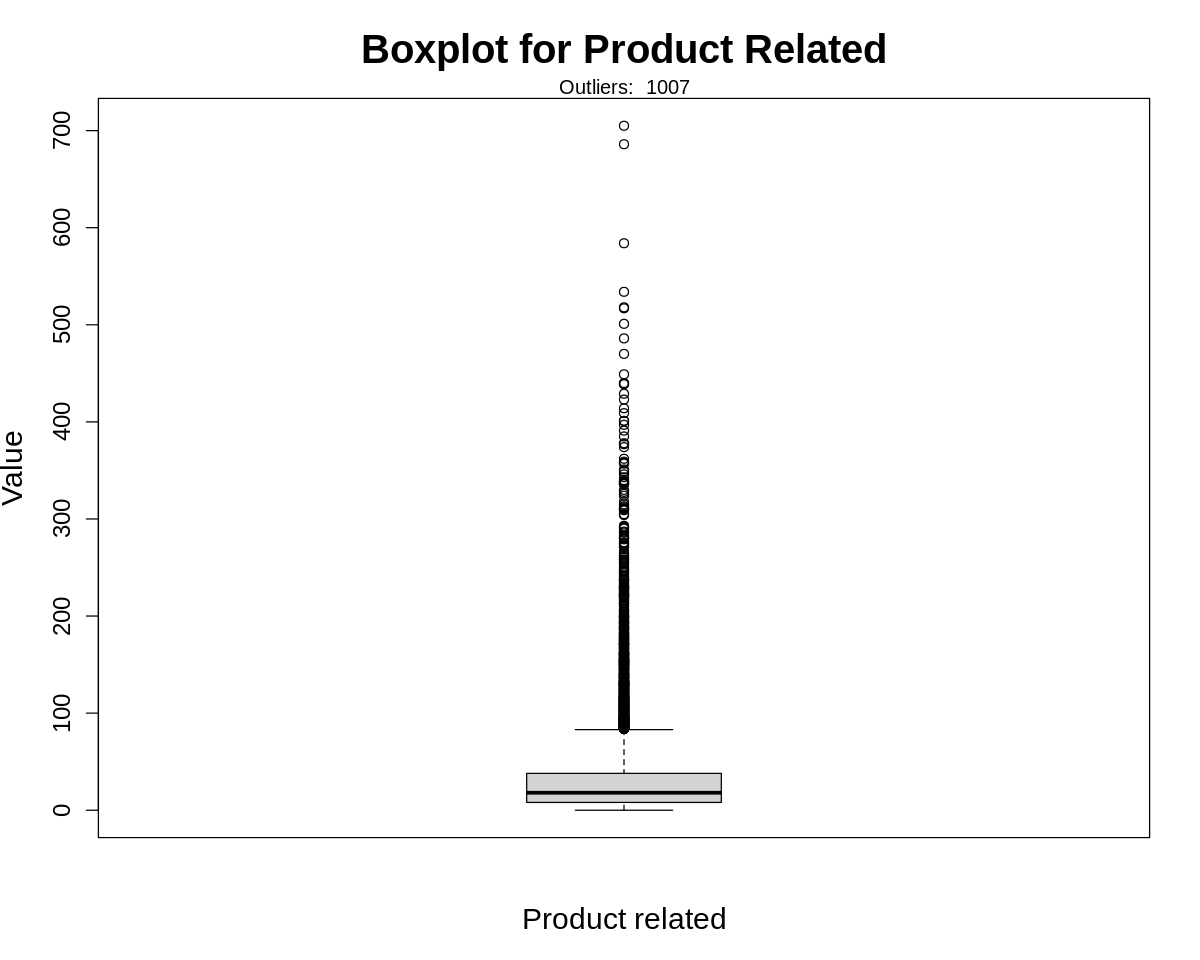

In [19]:
# plot a boxplot to check for outliers in the 'productrelated' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$productrelated, main="Boxplot for Product Related", xlab = "Product related", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_productrelated <- boxplot.stats(data$productrelated)$out
mtext(paste("Outliers: ", paste(length(outlier_productrelated), collapse=", ")), cex=1)

There are 1007 outliers in the 'productrelated' column

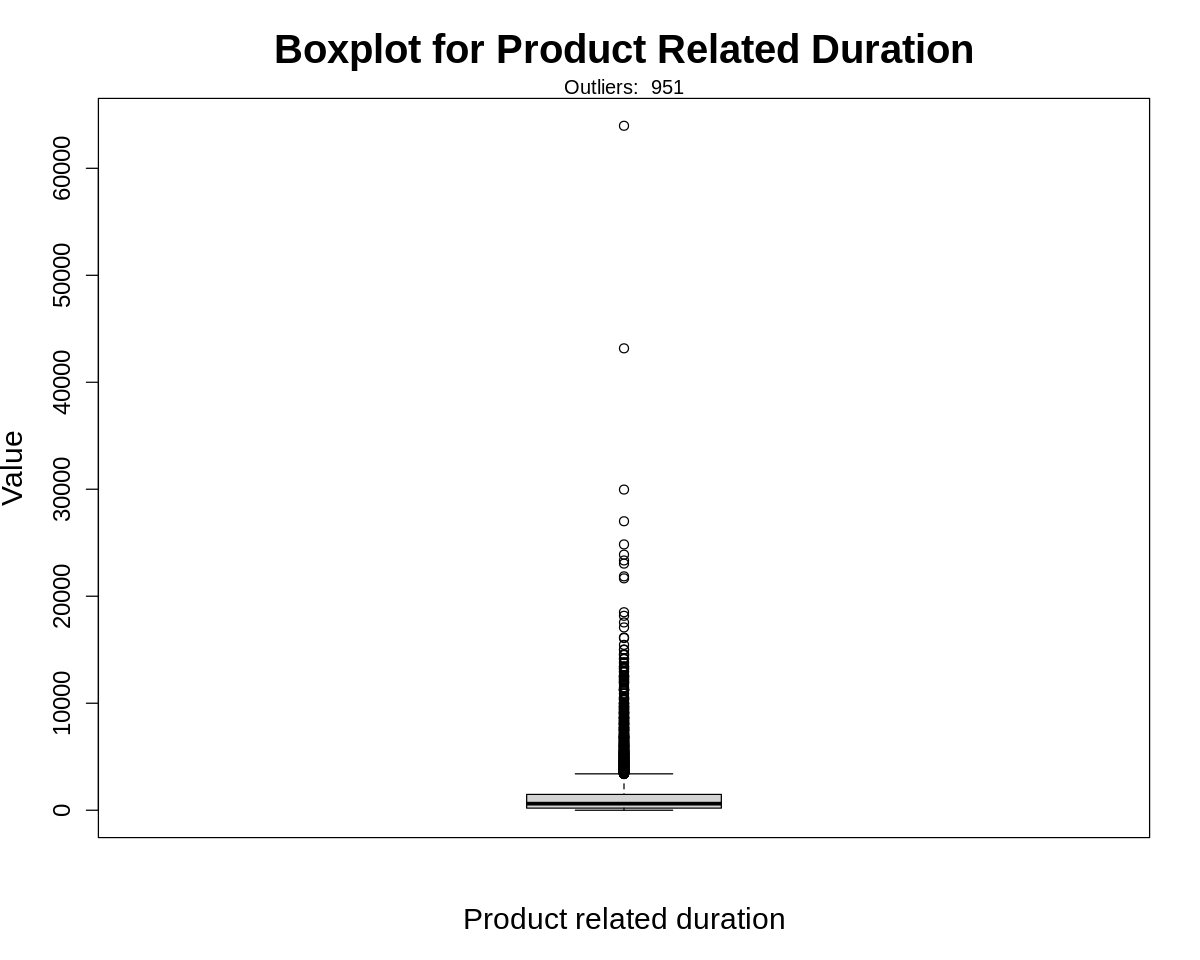

In [20]:
# plot a boxplot to check for outliers in the 'productrelated_duration' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$productrelated_duration, main="Boxplot for Product Related Duration", xlab = "Product related duration", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_productrelated_duration <- boxplot.stats(data$productrelated_duration)$out
mtext(paste("Outliers: ", paste(length(outlier_productrelated_duration), collapse=", ")), cex=1)

There are 951 outliers in the 'productrelated_duration' column

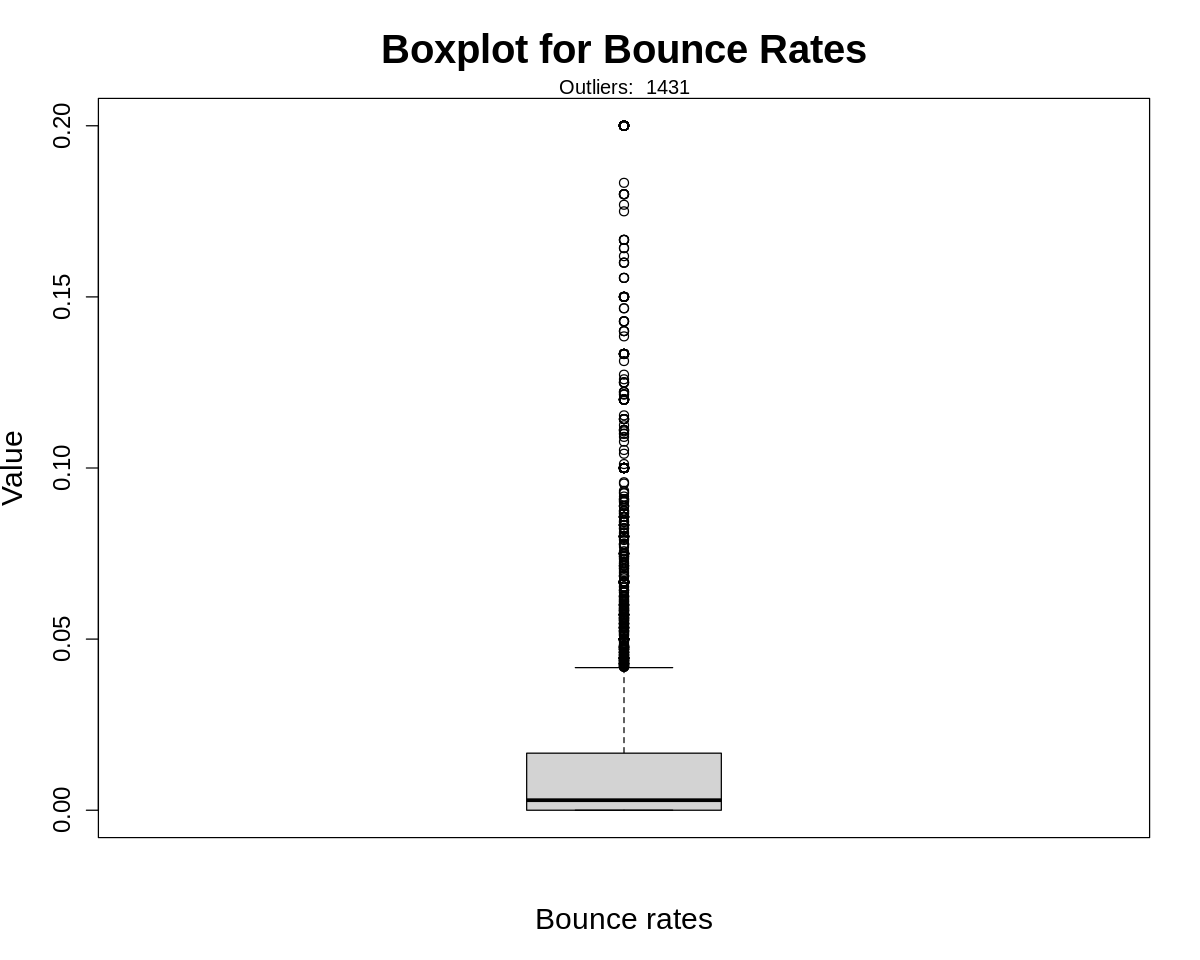

In [21]:
# plot a boxplot to check for outliers in the 'bouncerates' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$bouncerates, main="Boxplot for Bounce Rates", xlab = "Bounce rates", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_bouncerates <- boxplot.stats(data$bouncerates)$out
mtext(paste("Outliers: ", paste(length(outlier_bouncerates), collapse=", ")), cex=1)

There are 1431 outliers in the 'bouncerates' column

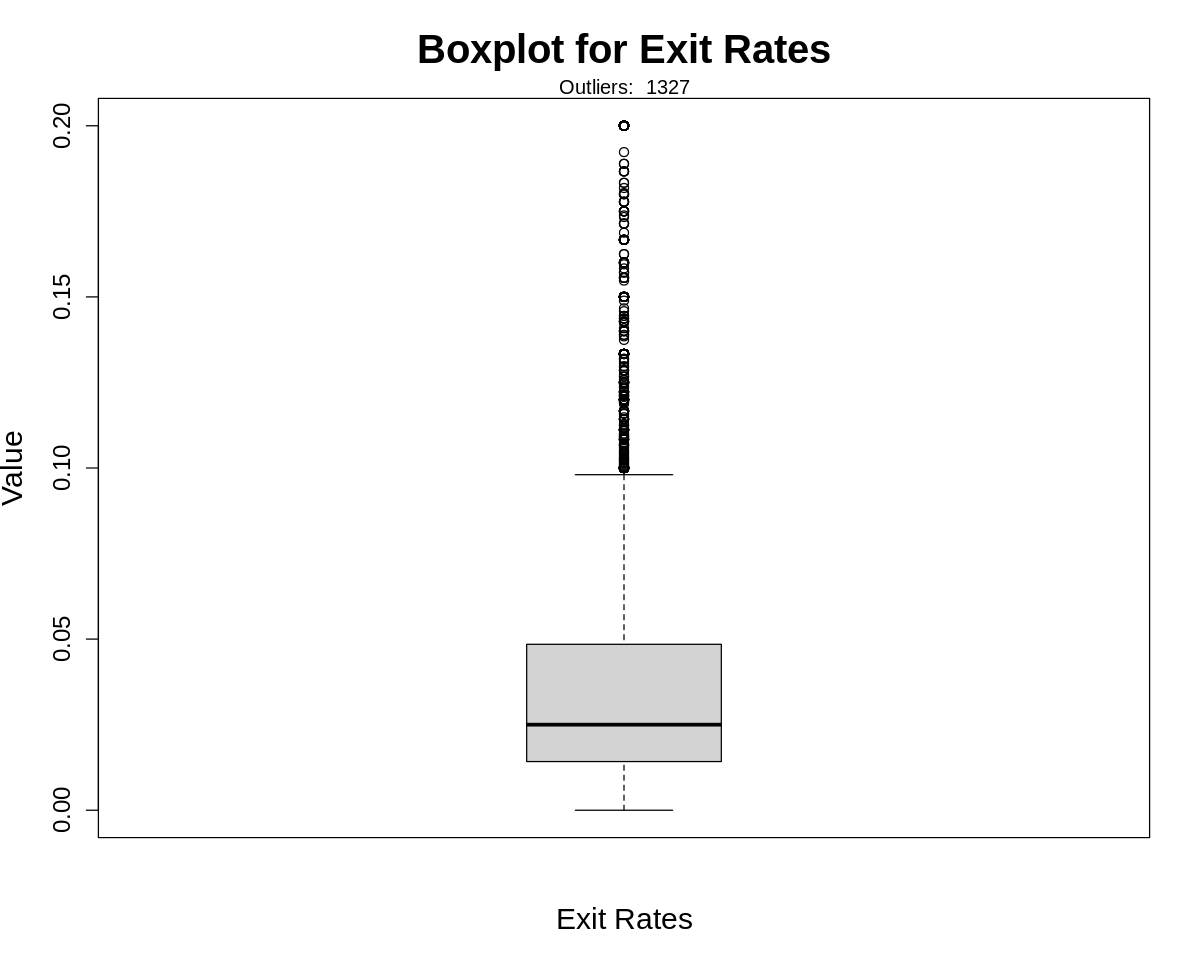

In [22]:
# plot a boxplot to check for outliers in the 'exitrates' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$exitrates, main="Boxplot for Exit Rates", xlab = "Exit Rates", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_exitrates <- boxplot.stats(data$exitrates)$out
mtext(paste("Outliers: ", paste(length(outlier_exitrates), collapse=", ")), cex=1)

There are 1327 outliers in the 'exitrates' column

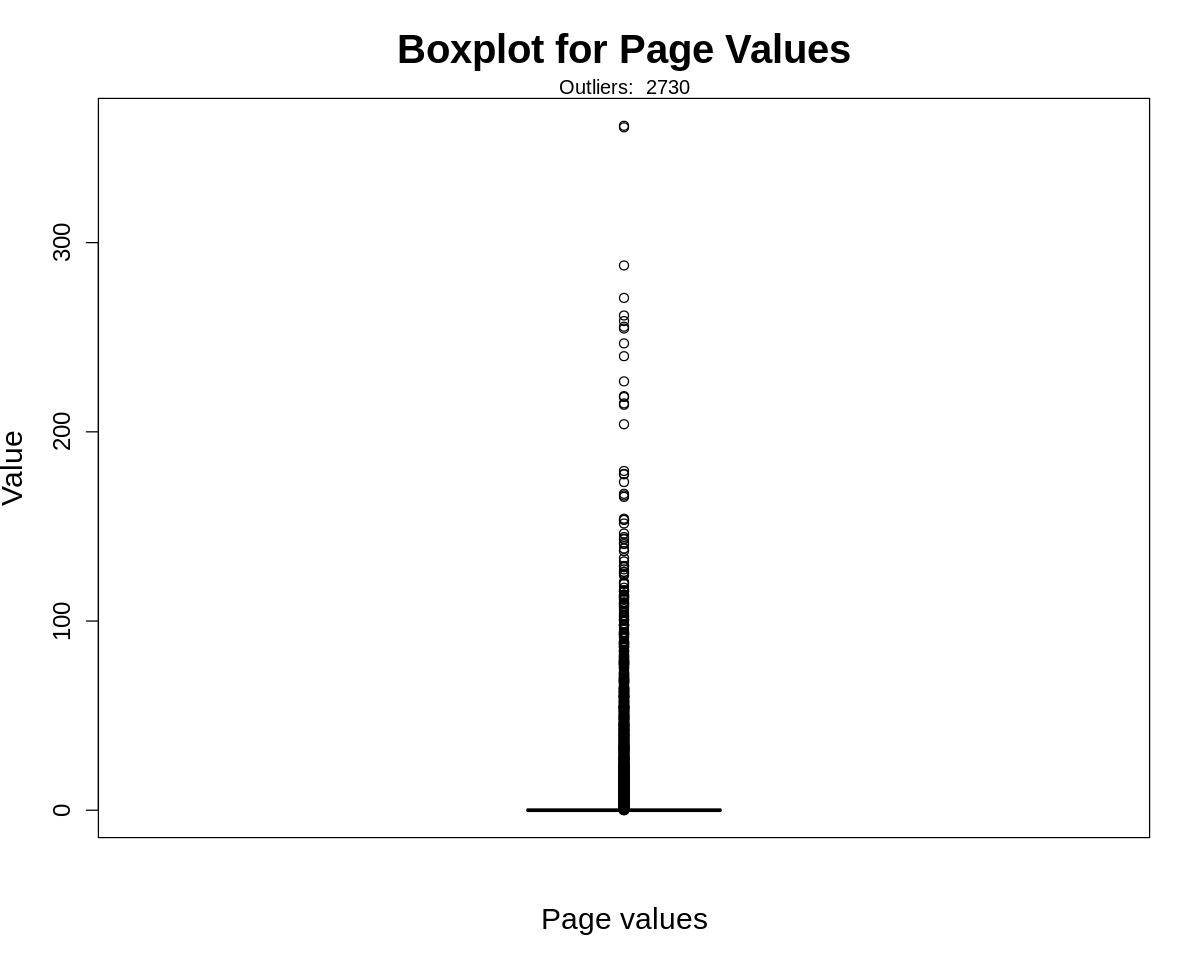

In [23]:
# plot a boxplot to check for outliers in the 'pagevalues' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$pagevalues, main="Boxplot for Page Values", xlab = "Page values", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_pagevalues <- boxplot.stats(data$pagevalues)$out
mtext(paste("Outliers: ", paste(length(outlier_pagevalues), collapse=", ")), cex=1)

There are 2370 outliers in the 'pagevalues' column

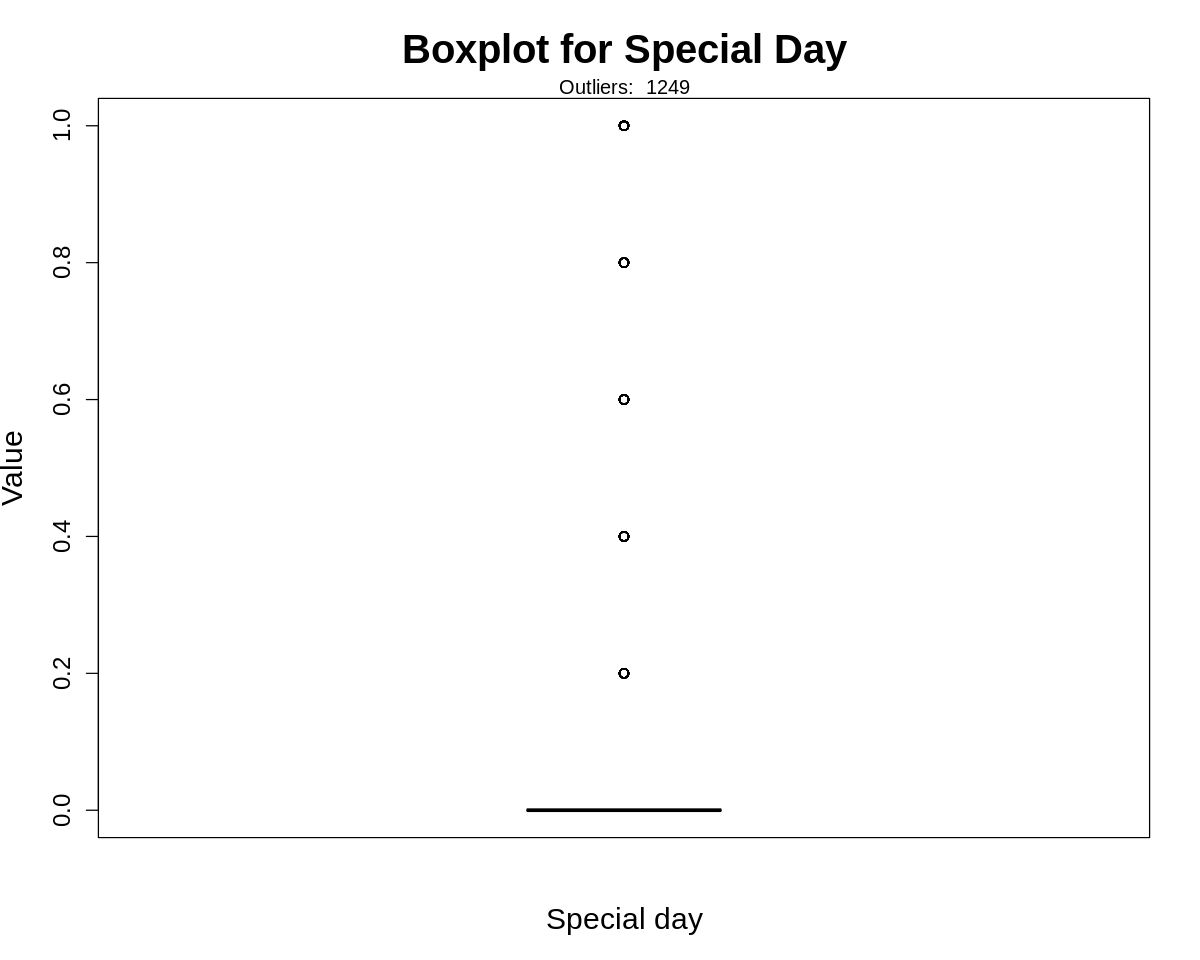

In [24]:
# plot a boxplot to check for outliers in the 'specialday' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$specialday, main="Boxplot for Special Day", xlab = "Special day", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_specialday <- boxplot.stats(data$specialday)$out
mtext(paste("Outliers: ", paste(length(outlier_specialday), collapse=", ")), cex=1)

There are 1249 outliers in the 'specialday' column

In [25]:
# check for anomalies in the 'month' column by scrutinizing its unique values 
print(unique(data$month))

 [1] "Feb"  "Mar"  "May"  "Oct"  "June" "Jul"  "Aug"  "Nov"  "Sep"  "Dec" 


There are 10 unique values and no anomalies in the 'month' column

In [26]:
# check for anomalies in the 'operatingsystems' column by scrutinizing its unique values 
print(unique(data$operatingsystems))

[1] 1 2 4 3 7 6 8 5


There are 8 unique values and no anomalies in the 'operatingsystems' column

In [27]:
# check for anomalies in the 'browser' column by scrutinizing its unique values 
print(unique(data$browser))

 [1]  1  2  3  4  5  6  7 10  8  9 12 13 11


There are 13 unique values and no anomalies in the 'browser' column

In [28]:
# check for anomalies in the 'region' column by scrutinizing its unique values 
print(unique(data$region))

[1] 1 9 2 3 4 5 6 7 8


There are 9 unique values and no anomalies in the 'browser' column

In [29]:
# check for anomalies in the 'traffictype' column by scrutinizing its unique values 
print(unique(data$traffictype))

 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20


There are 20 unique values and no anomalies in the 'traffictype' column

In [30]:
# check for anomalies in the 'visitortype' column by scrutinizing its unique values 
print(unique(data$visitortype))

[1] "Returning_Visitor" "New_Visitor"       "Other"            


In [31]:
# find the number of rows with 'Other' as the visitor type
sum(data$visitortype == 'Other')

[1] 81

We will drop the records with 'Other' as the visitor type so that we remain with the two classes

In [32]:
data <- data[!(data$visitortype =="Other")]


In [33]:
# check for anomalies in the 'weekend' column by scrutinizing its unique values 
print(unique(data$weekend))

[1] FALSE  TRUE


There are 2 unique values and no anomalies in the 'weekend' column

In [34]:
# check for anomalies in the 'revenue' column by scrutinizing its unique values 
print(unique(data$revenue))

[1] FALSE  TRUE


There are 2 unique values and no anomalies in the 'revenue' column

In [35]:
# change the data types of 'operatingsystems', 'browser', 'region' and 'traffictype' columns to 'factor'
data <- transform(data, operatingsystems=as.factor(operatingsystems), browser=as.factor(browser), region=as.factor(region), traffictype=as.factor(traffictype))

In [36]:
# check the dimensions of the dataframe after data cleaning
dim(data)

[1] 12118    18

## Univariate analysis
Univariate analysis will help us gain insights on the general characteristics of the individual variables in the dataset.

### Numerical variables



#### Measures of central tendency and measures of dispersion

In [37]:
# identify numerical variables in the dataframe
num_col <- unlist(lapply(data, is.numeric))

# create a subset that contains the numerical variables
data_num <- subset(data, select=num_col) 

In [38]:
# compute the measures of cenral tendancy and the measures of dispersion of the numerical variables and contain them in a dataframe
stats <- data.frame(
  Mean = apply(data_num, 2, mean), 
  Median = apply(data_num, 2, median), 
  Mode = apply(data_num, 2, mfv ), 
  Min = apply(data_num, 2, min),  
  Max = apply(data_num, 2, max),    
  Variance= apply(data_num, 2, var),  
  Std = apply(data_num, 2, sd),
  Skewness = apply(data_num, 2, skewness), 
  Kurtosis = apply(data_num, 2, kurtosis)) 

# round off the values to 2 decimal places and display the dataframe
stats <- round(stats, 2)
stats

,Mean,Median,Mode,Min,Max,Variance,Std,Skewness,Kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
administrative,2.35,1.00,0.0,0,27.00,11.12,3.33,1.94,7.62
administrative_duration,81.79,9.50,0.0,-1,3398.75,31438.36,177.31,5.58,53.18
informational,0.51,0.00,0.0,0,24.00,1.63,1.28,4.01,29.55
informational_duration,34.99,0.00,0.0,-1,2549.38,20116.11,141.83,7.52,78.12
productrelated,32.19,18.00,1.0,0,705.00,1995.42,44.67,4.33,33.99
productrelated_duration,1211.58,614.70,0.0,-1,63973.52,3697301.41,1922.84,7.25,139.58
bouncerates,0.02,0.00,0.0,0,0.20,0.00,0.05,3.16,12.36
exitrates,0.04,0.03,0.2,0,0.20,0.00,0.05,2.24,7.67
pagevalues,5.86,0.00,0.0,0,361.76,329.79,18.16,6.09,61.93


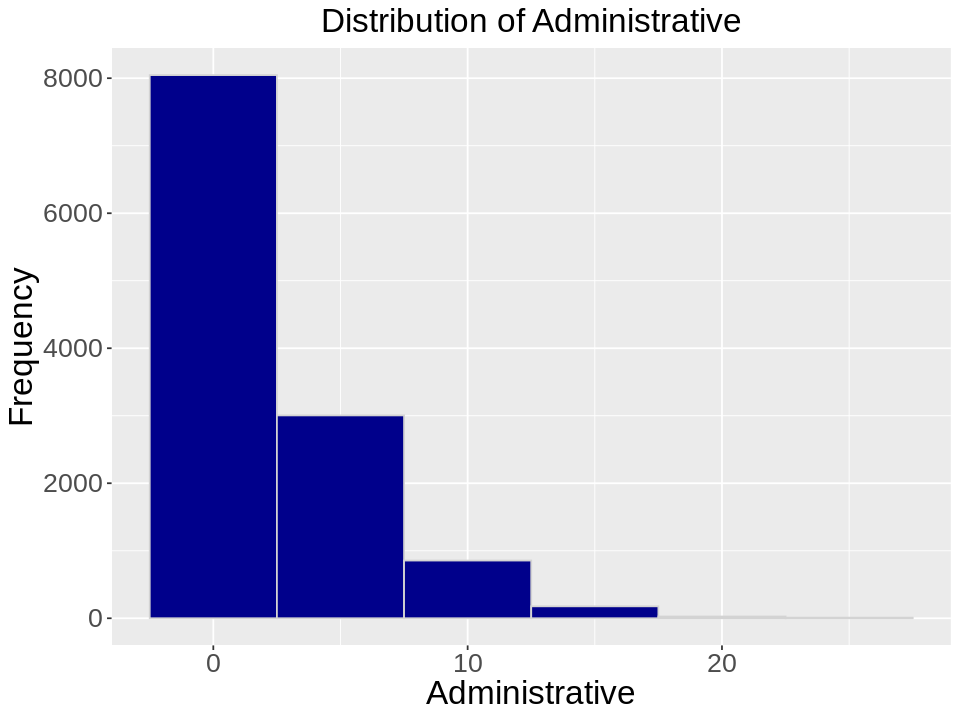

In [39]:
# plot a histogram to visualize the distribution of values in 'administrative' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = administrative ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 5) +
    labs(title = "Distribution of Administrative", x = "Administrative", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

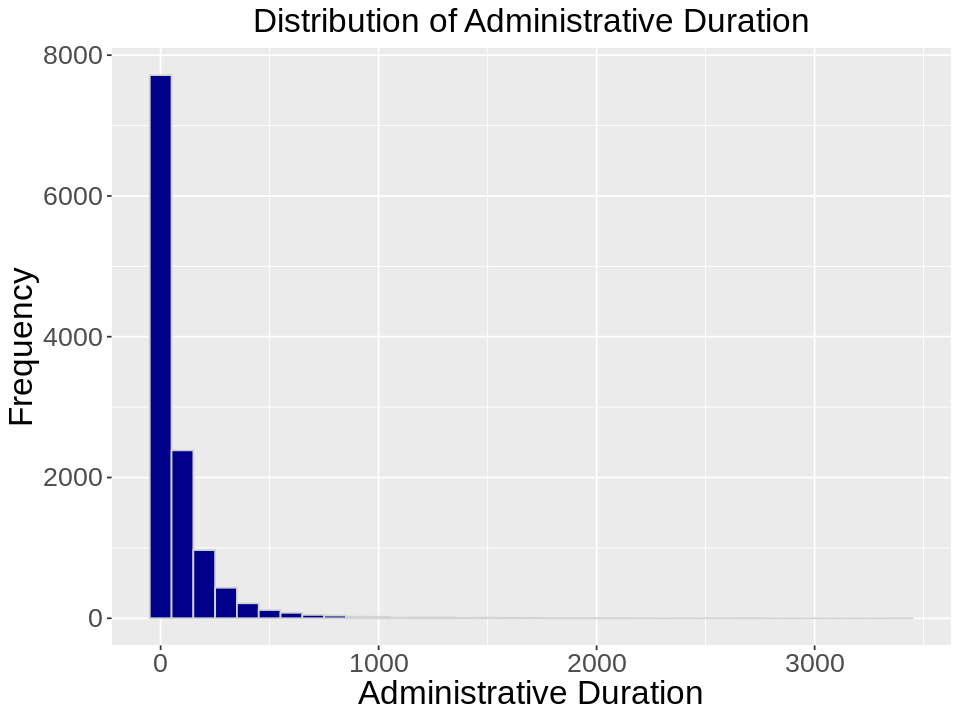

In [40]:
# plot a histogram to visualize the distribution of values in 'administrative_duration' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = administrative_duration ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 100) +
    labs(title = "Distribution of Administrative Duration", x = "Administrative Duration", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

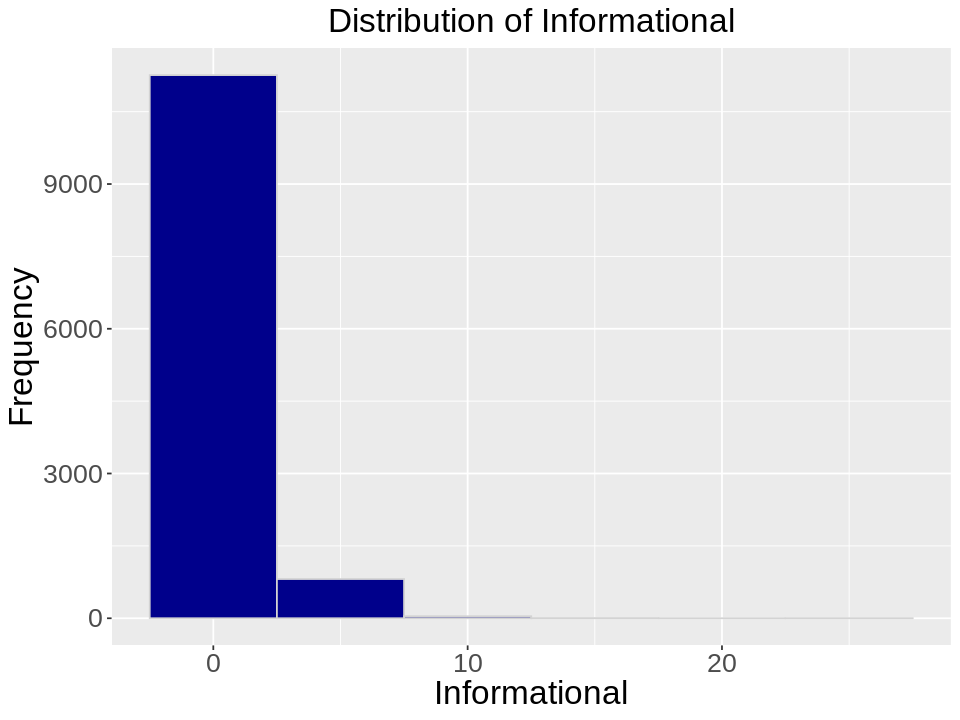

In [41]:
# plot a histogram to visualize the distribution of values in 'informational' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = informational ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 5) +
    labs(title = "Distribution of Informational", x = "Informational", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

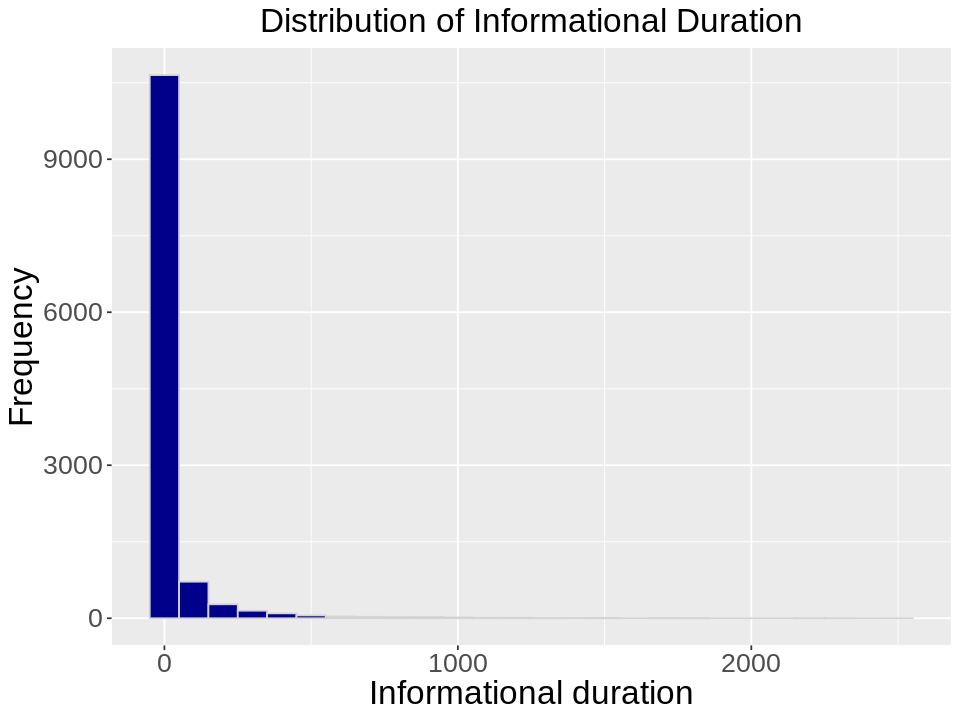

In [42]:
# plot a histogram to visualize the distribution of values in 'informational_duration' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = informational_duration ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 100) +
    labs(title = "Distribution of Informational Duration", x = "Informational duration", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

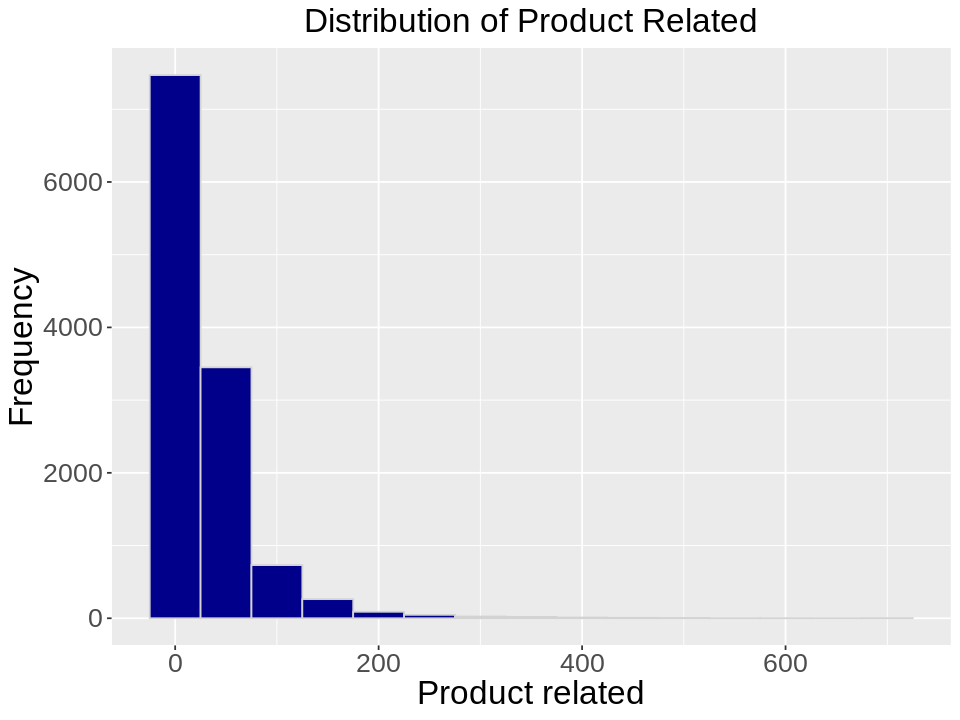

In [43]:
# plot a histogram to visualize the distribution of values in 'productrelated' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = productrelated ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 50) +
    labs(title = "Distribution of Product Related", x = "Product related", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

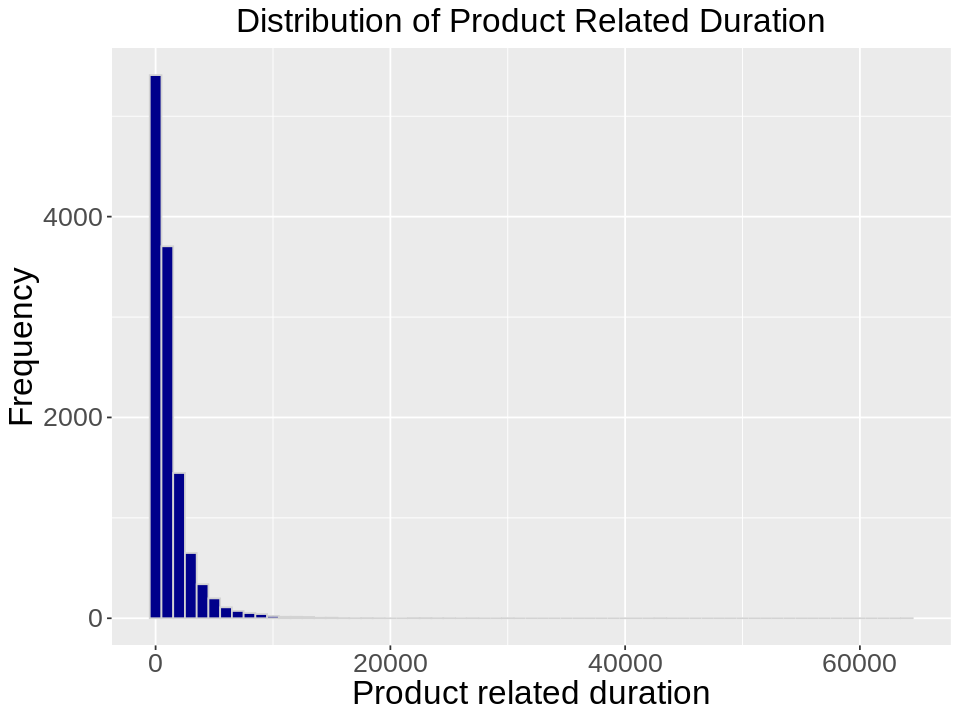

In [44]:
# plot a histogram to visualize the distribution of values in 'productrelated_duration' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = productrelated_duration ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 1000) +
    labs(title = "Distribution of Product Related Duration", x = "Product related duration", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

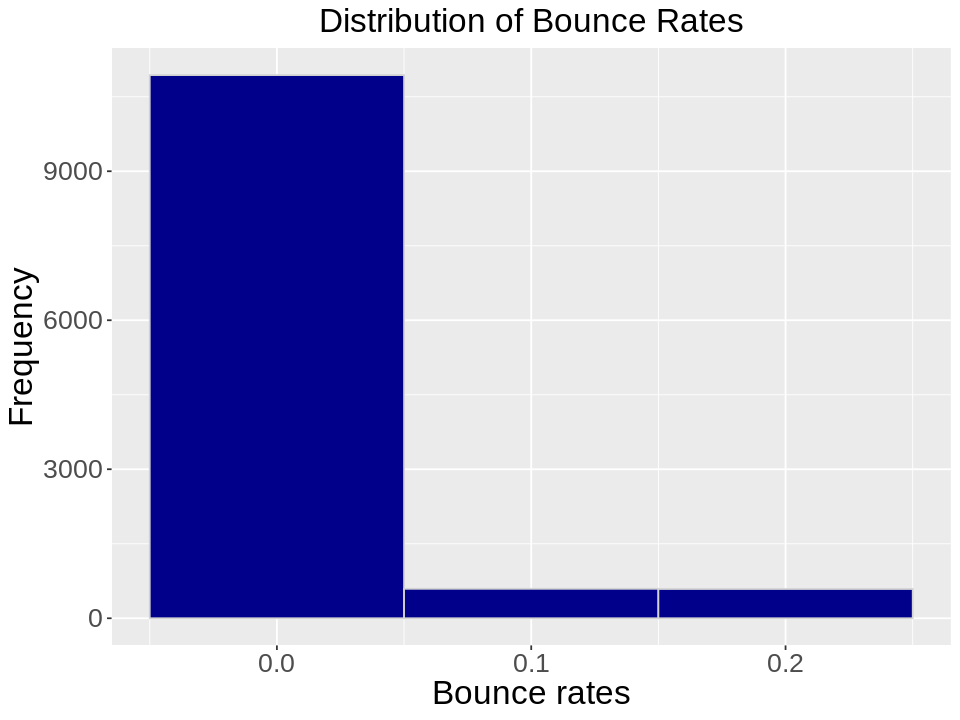

In [45]:
# plot a histogram to visualize the distribution of values in 'bouncerates' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = bouncerates ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 0.1) +
    labs(title = "Distribution of Bounce Rates", x = "Bounce rates", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

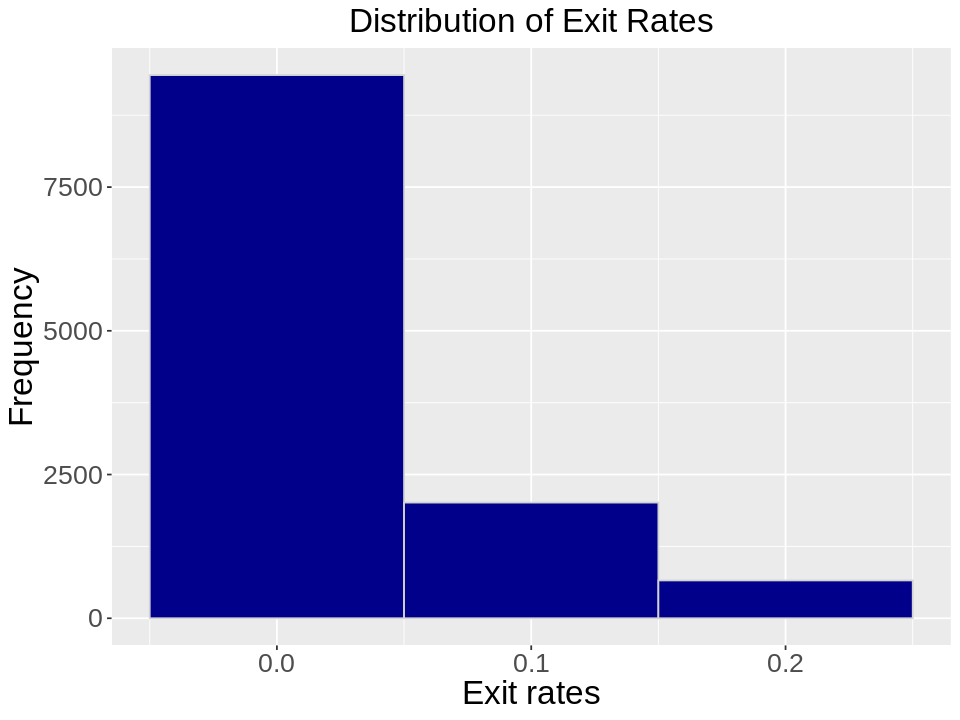

In [46]:
# plot a histogram to visualize the distribution of values in 'exitrates' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = exitrates ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 0.1) +
    labs(title = "Distribution of Exit Rates", x = "Exit rates", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

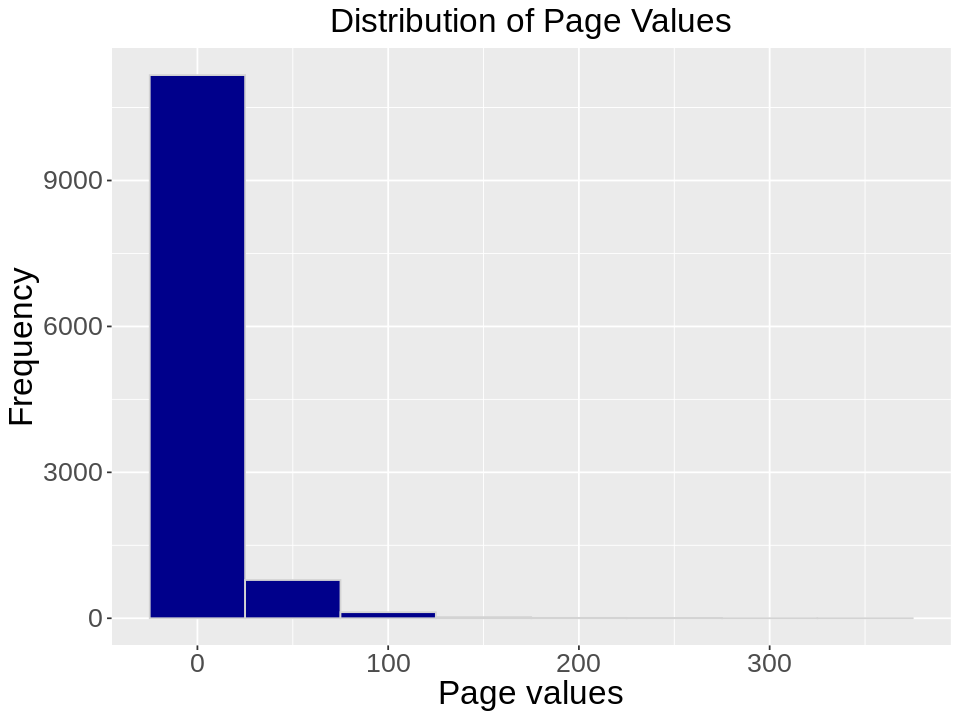

In [47]:
# plot a histogram to visualize the distribution of values in 'pagevalues' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = pagevalues ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 50) +
    labs(title = "Distribution of Page Values", x = "Page values", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

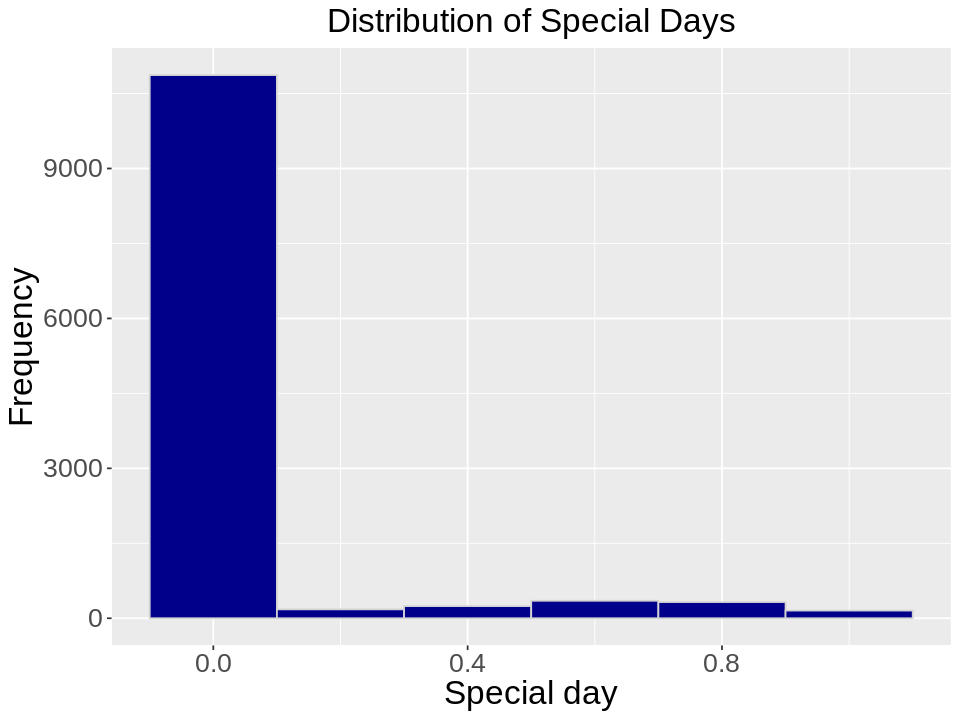

In [48]:
# plot a histogram to visualize the distribution of values in 'specialday' column

options(repr.plot.width = 8, repr.plot.height = 6)
p = data %>% ggplot(aes(x = specialday ))

p + geom_histogram(color="lightgray", fill="darkblue", binwidth = 0.2) +
    labs(title = "Distribution of Special Days", x = "Special day", y = "Frequency") +
    theme(axis.title = element_text(size = 20),
          axis.text = element_text(size=16),
          plot.title = element_text(hjust = 0.5, size = 20))

### Categorical variables

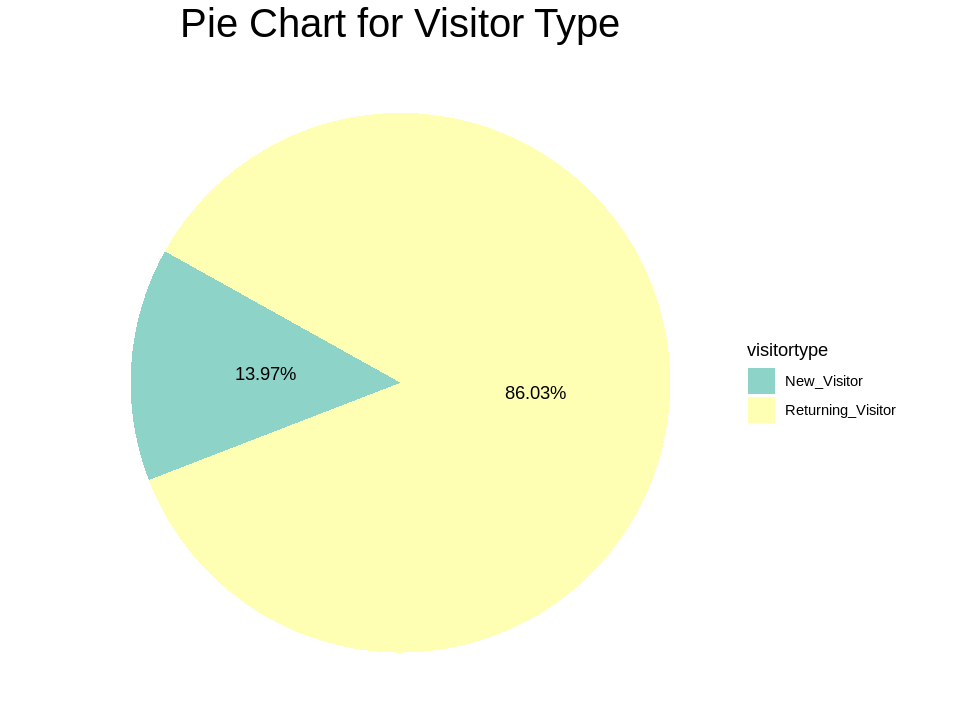

In [49]:
# plot a pie chart to visualize the proportion of values in the 'visitortype' column
data.visitortype = data %>% 
  filter(visitortype != "NA") %>% 
  group_by(visitortype) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(visitortype)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.visitortype, 
       aes(x = "", y = percentage, fill = visitortype))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Set3") + labs(title= 'Pie Chart for Visitor Type') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


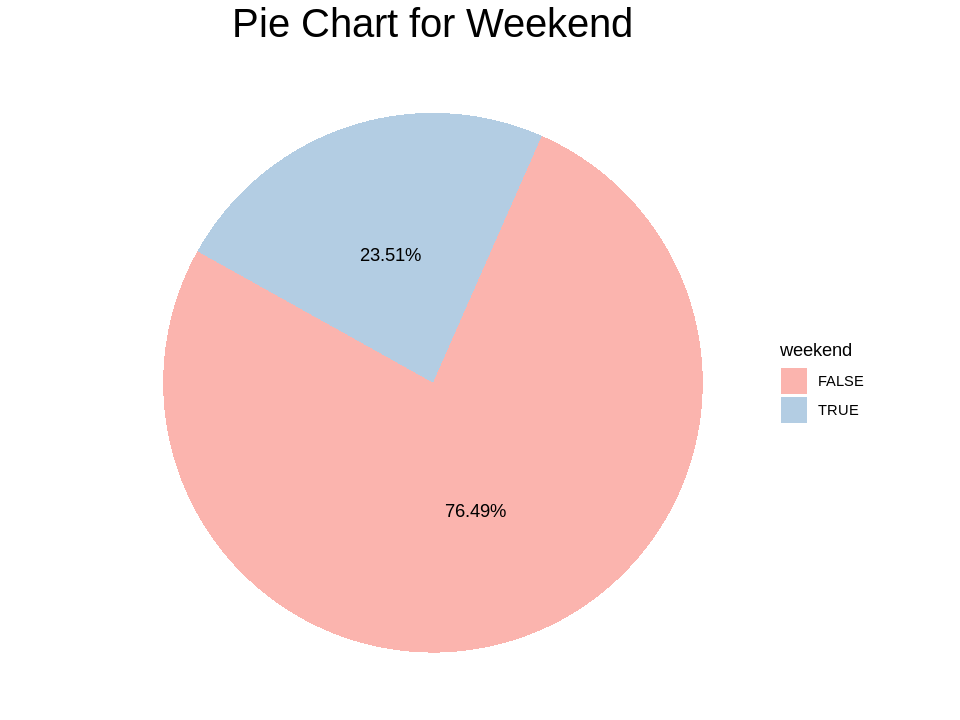

In [50]:
# plot a pie chart to visualize the proportion of values in the 'weekend' column
data.weekend = data %>% 
  filter(weekend != "NA") %>% 
  group_by(weekend) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(weekend)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.weekend, 
       aes(x = "", y = percentage, fill = weekend))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Pastel1") + labs(title= 'Pie Chart for Weekend') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


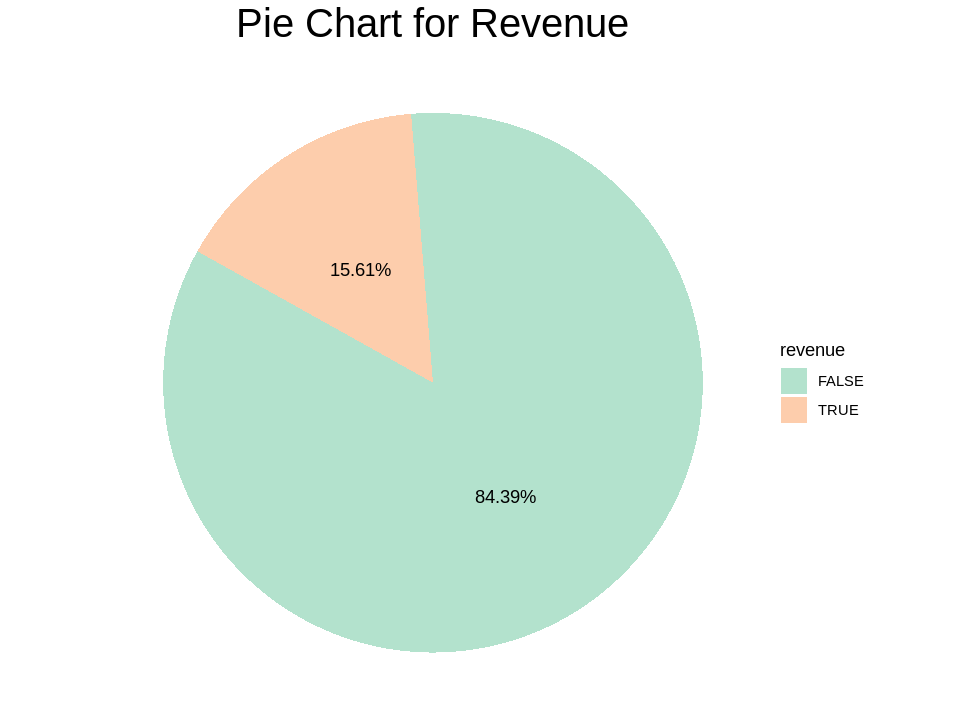

In [51]:
# plot a pie chart to visualize the proportion of values in the 'revenue' column
data.revenue = data %>% 
  filter(revenue != "NA") %>% 
  group_by(revenue) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(revenue)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.revenue, 
       aes(x = "", y = percentage, fill = revenue))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Pastel2") + labs(title= 'Pie Chart for Revenue') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


data$traffictype,n,percent
<fct>,<dbl>,<dbl>
1,2376,1.960720e-01
2,3896,3.215052e-01
3,2010,1.658690e-01
4,1066,8.796831e-02
5,259,2.137316e-02
6,442,3.647467e-02
7,40,3.300875e-03
8,342,2.822248e-02
9,41,3.383397e-03


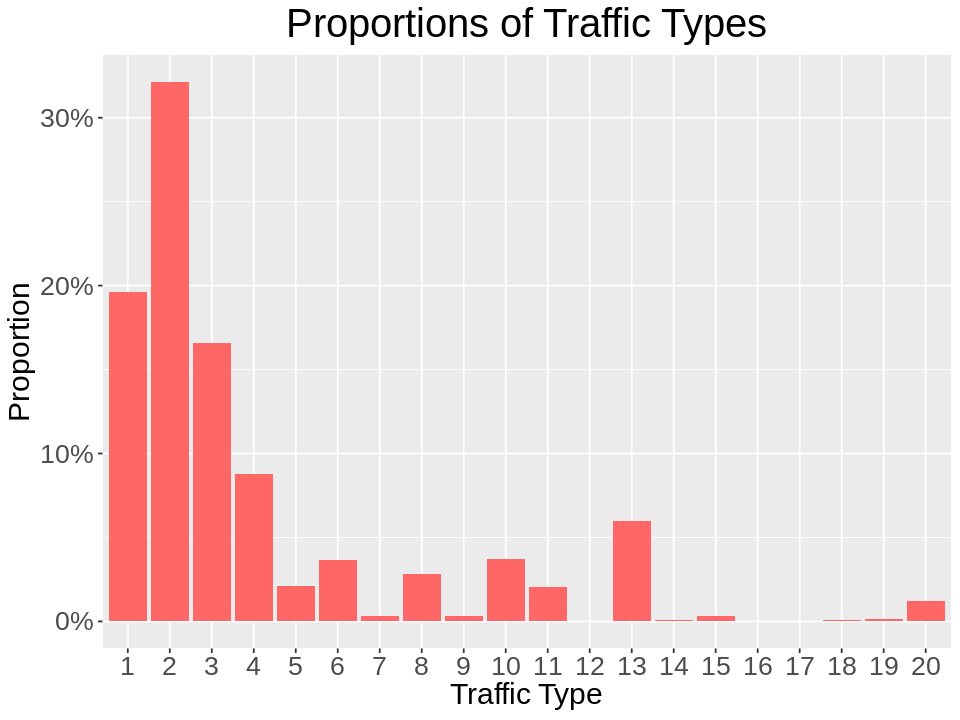

In [52]:
# plot a bar chart to visualize the proportion of values in 'traffictype' column
ggplot(data, aes(traffictype)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6666") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Traffic Types', x='Traffic Type', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))
# create a frequency table to get the actual figures of frequencies of parts of month using tabyl function
tabyl(data$traffictype, sort = TRUE)

data$region,n,percent
<fct>,<dbl>,<dbl>
1,4703,0.38810035
2,1122,0.09258954
3,2374,0.19590692
4,1163,0.09597293
5,317,0.02615943
6,799,0.06593497
7,756,0.06238653
8,430,0.03548440
9,454,0.03746493


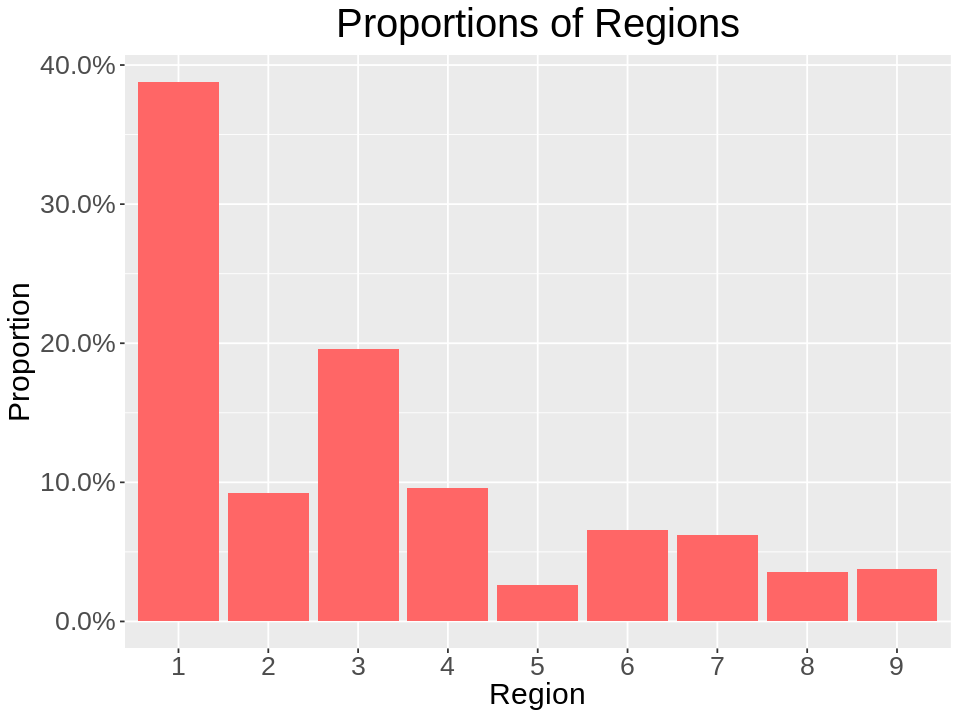

In [53]:
# plot a bar chart to visualize the proportion of values in 'region' column
ggplot(data, aes(region)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6666") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Regions', x='Region', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))
# create a frequency table to get the actual figures of frequencies of parts of month using tabyl function
tabyl(data$region, sort = TRUE)

data$browser,n,percent
<fct>,<dbl>,<dbl>
1,2420,1.997029e-01
2,7857,6.483743e-01
3,105,8.664796e-03
4,727,5.999340e-02
5,464,3.829015e-02
6,174,1.435881e-02
7,49,4.043572e-03
8,135,1.114045e-02
9,1,8.252187e-05


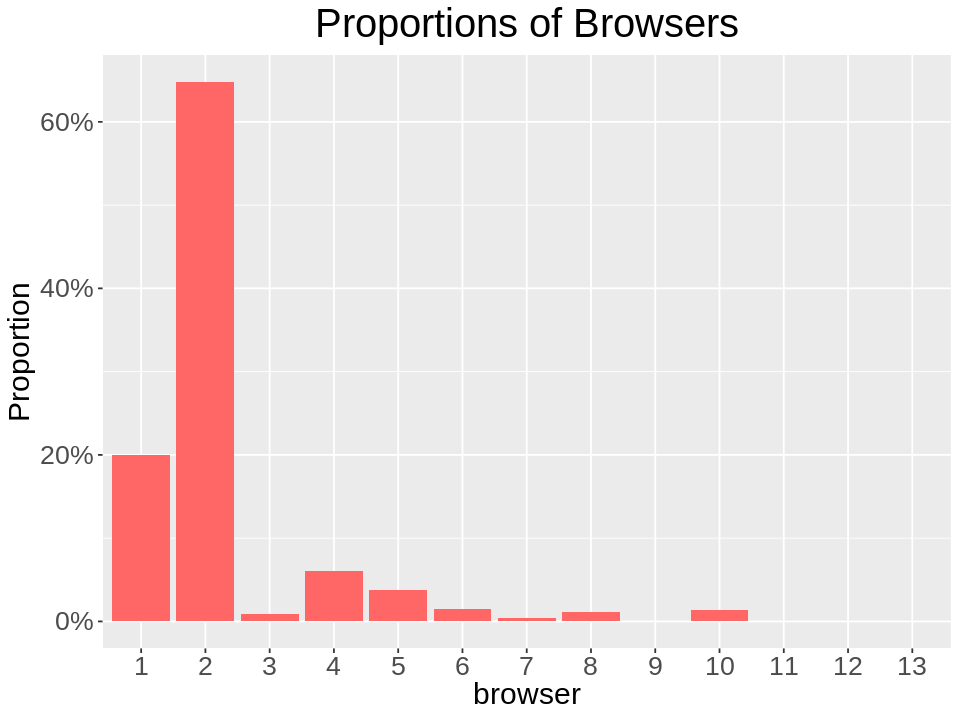

In [54]:
# plot a bar chart to visualize the proportion of values in 'browser' column
ggplot(data, aes(browser)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6666") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Browsers', x='browser', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))
# create a frequency table to get the actual figures of frequencies of parts of month using tabyl function
tabyl(data$browser, sort = TRUE)

data$operatingsystems,n,percent
<fct>,<dbl>,<dbl>
1,2541,0.2096880673
2,6520,0.5380425813
3,2522,0.2081201518
4,478,0.0394454530
5,6,0.0004951312
6,19,0.0015679155
7,7,0.0005776531
8,25,0.0020630467


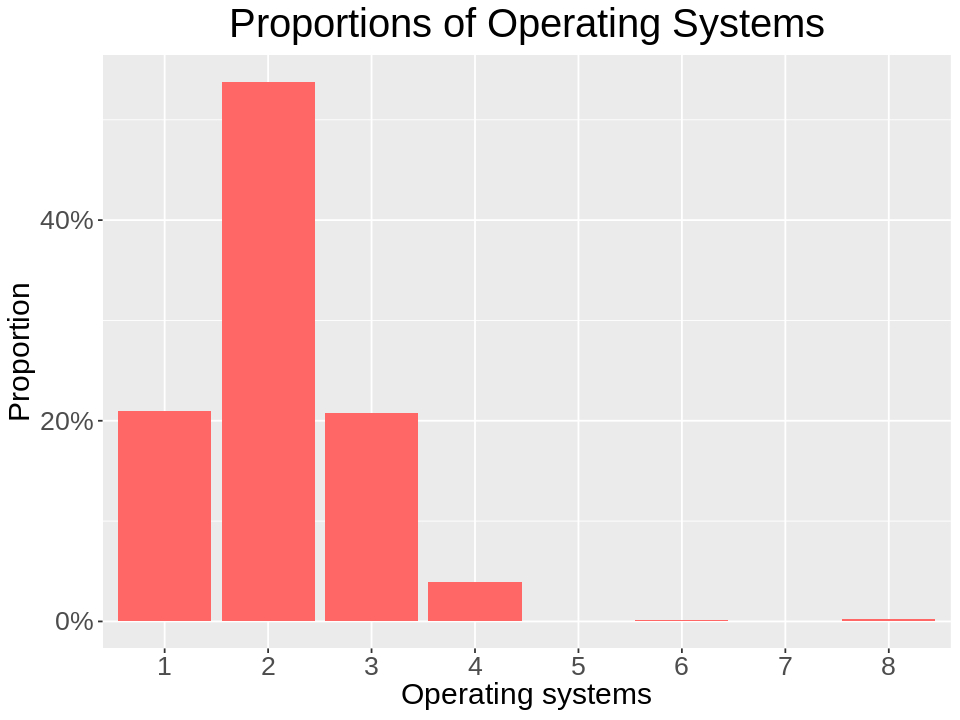

In [55]:
# plot a bar chart to visualize the proportion of values in 'operatingsystems' column
ggplot(data, aes(operatingsystems)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6666") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Operating Systems', x='Operating systems', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))
# create a frequency table to get the actual figures of frequencies of parts of month using tabyl function
tabyl(data$operatingsystems, sort = TRUE)

More individuals used the internet early and mid month than late in the month

data$month,n,percent
<chr>,<dbl>,<dbl>
Aug,433,0.03573197
Dec,1648,0.13599604
Feb,182,0.01501898
Jul,432,0.03564945
June,284,0.02343621
Mar,1853,0.15291302
May,3328,0.27463278
Nov,2961,0.24434725
Oct,549,0.04530451


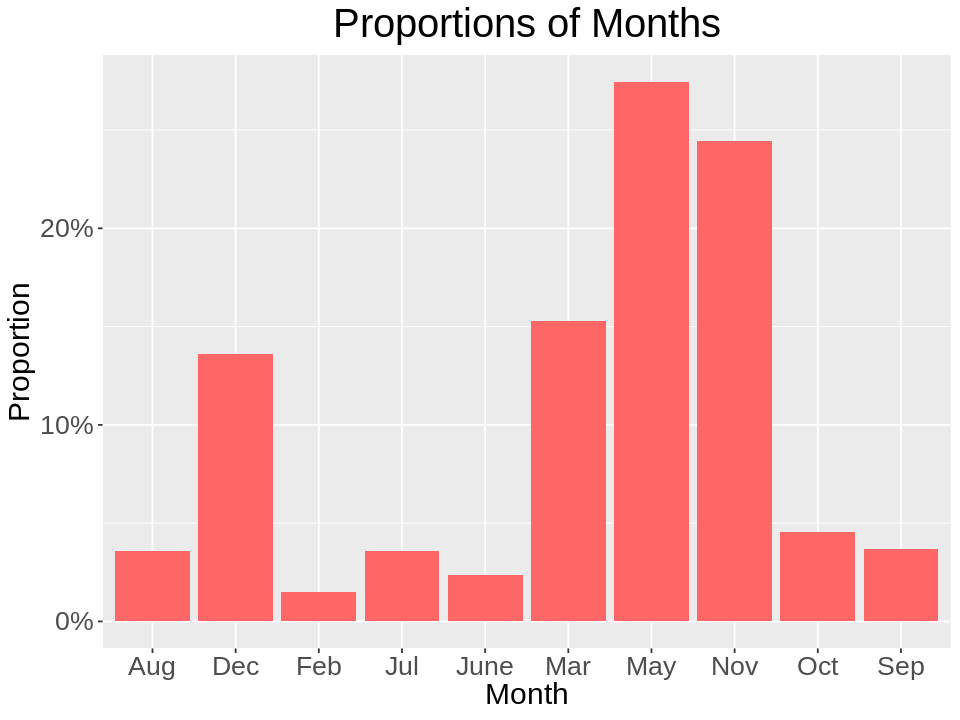

In [56]:
# plot a bar chart to visualize the proportion of values in 'month' column
ggplot(data, aes(month)) + 
        geom_bar(aes(y = (..count..)/sum(..count..)), fill = "#FF6666") + 
        scale_y_continuous(labels=scales::percent) +
        labs(title= 'Proportions of Months', x='Month', y="Proportion") + 
        theme(axis.title = element_text(size = 18),
              axis.text = element_text(size=16),
              plot.title = element_text(hjust = 0.5, size = 24))
# create a frequency table to get the actual figures of frequencies of parts of month using tabyl function
tabyl(data$month, sort = TRUE)

General observations

- Most of the visitors are returning visitors
- Most of the visitors visited the site on weekdays
- Majority of the visitors do not generate revenue
- The region with the most number of visitors is region 1
- The most common traffic type is type 2 
- The most common browser is browser 2
- The most common operating system is operating system 2
- The month of May had the most number of visitors 

## Bivariate analysis  
Bivariate analysis will help us establish the relationship between the variables

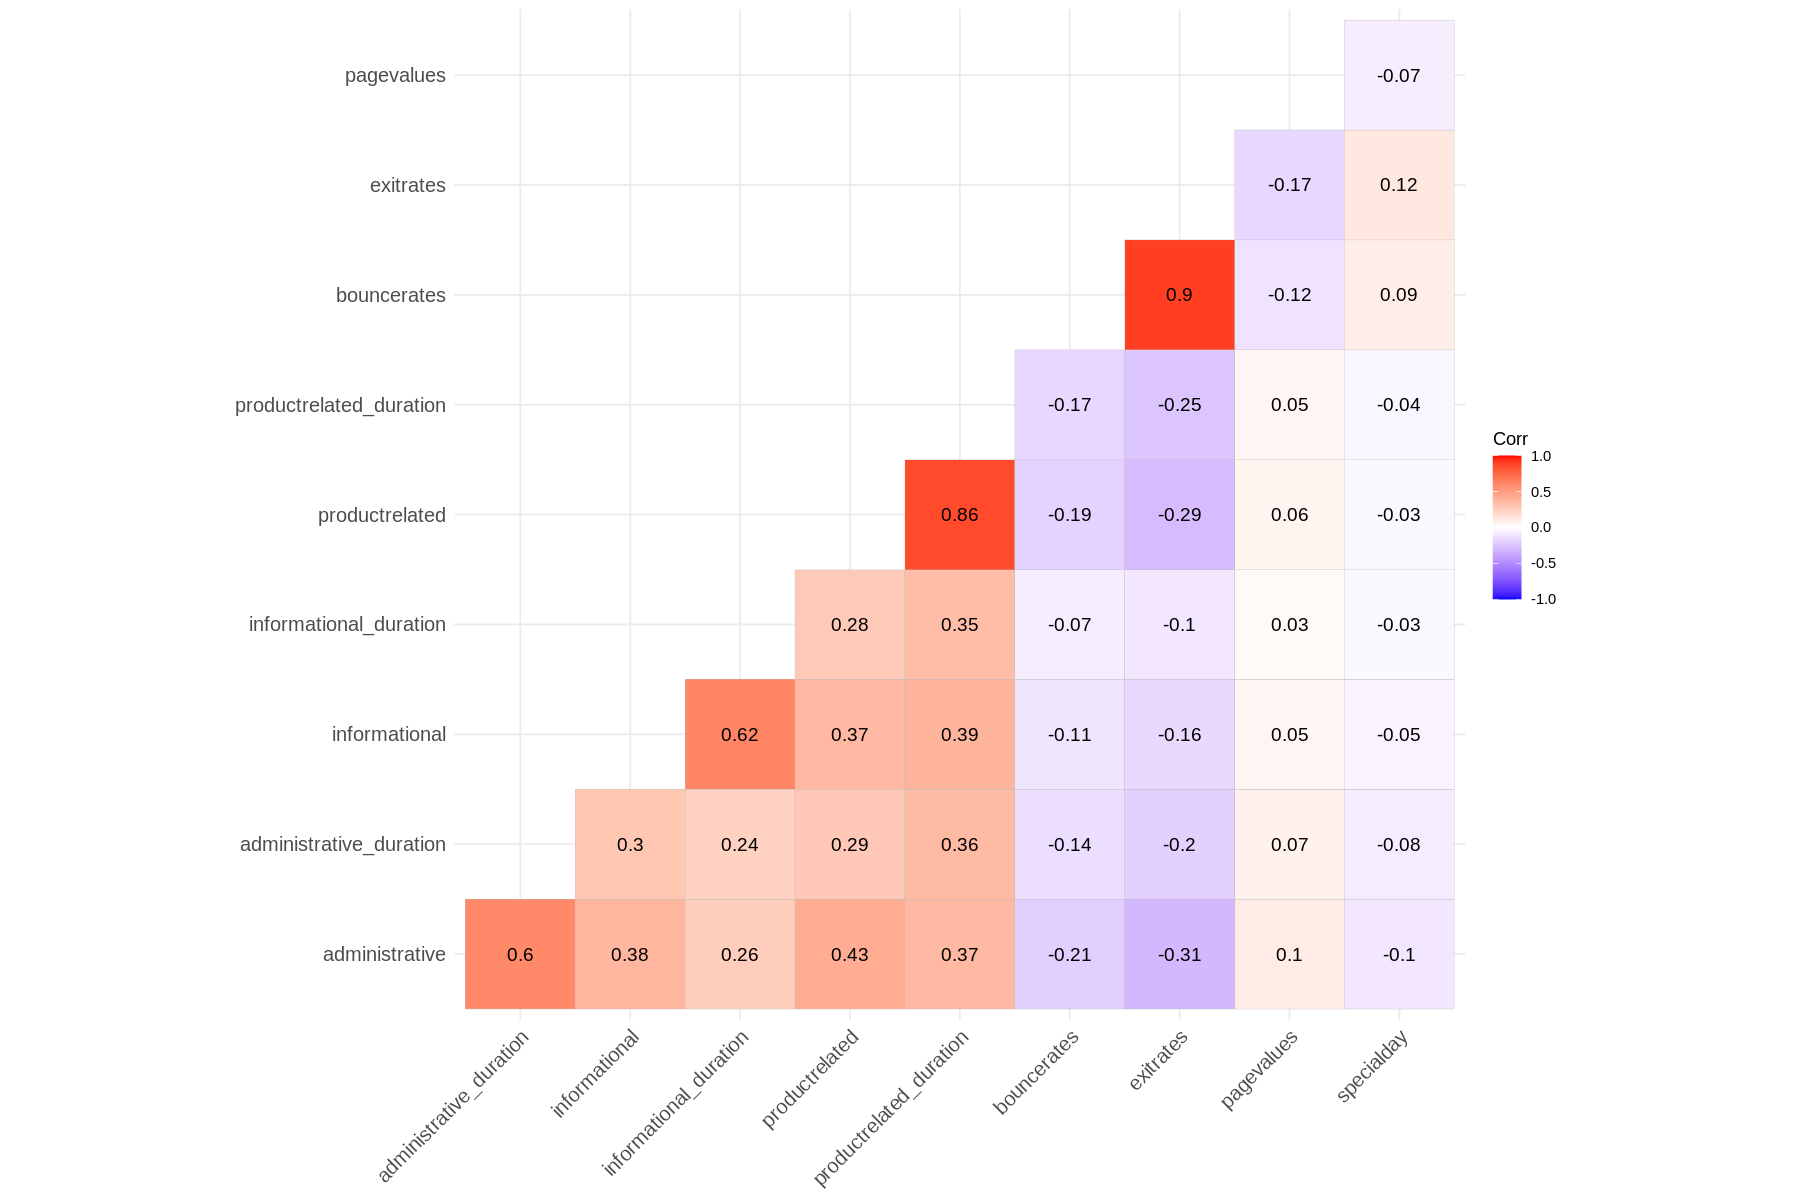

In [57]:
# compute the correlation coefficients between the numerical variables
corr <- cor(data_num)

# plot a heat map to visualize correlations
options(repr.plot.height = 10, repr.plot.width = 15)

ggcorrplot(round(corr, 2) ,lab = T,type = 'lower')

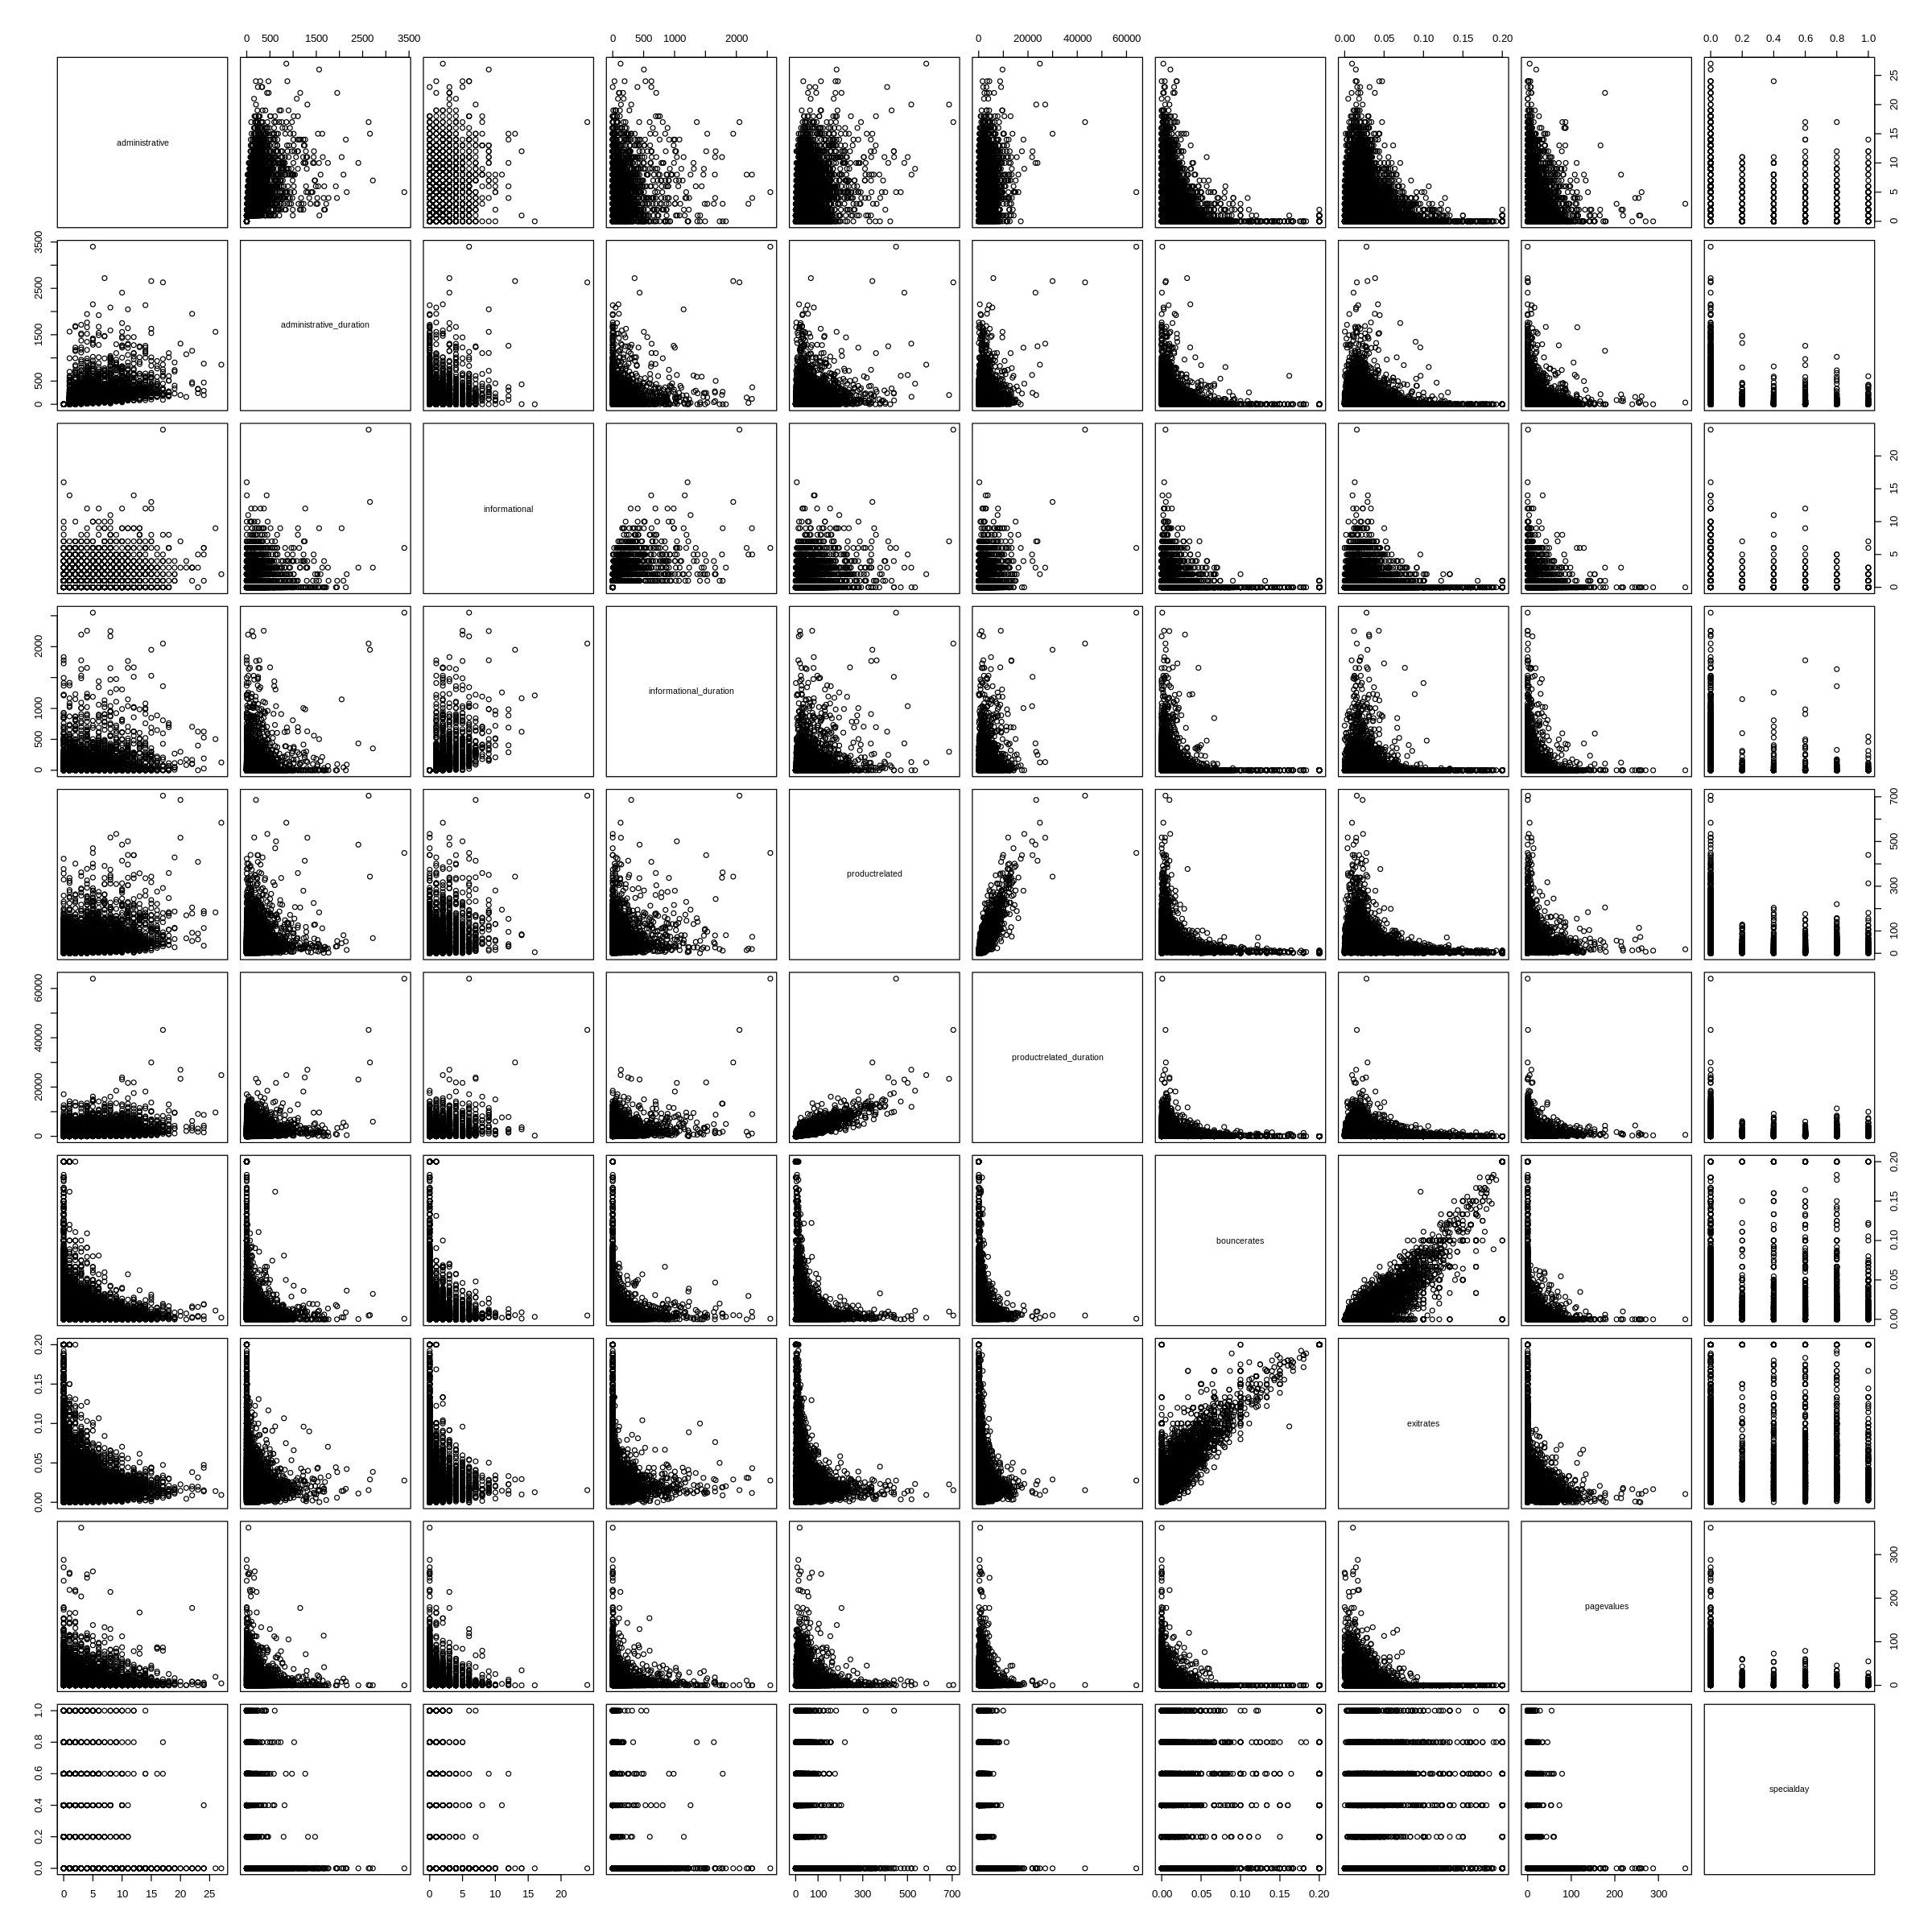

In [58]:
# plot pair plots to view the distribution of the values per pair of variables
options(repr.plot.height = 20, repr.plot.width = 20)
pairs(data_num)

There is a very strong positive correlation between:  
* Bounce rates and exit rates
* Product related site visits and product related duration  
  
There is a strong positive correlation between:
* Administrative site visits and administrative duration
* Informational site visits and informational duration

There are weak correlations between the rest of the variables

In [59]:
# find the means of 'administrative_duration', informational_duration', 'productrelated_duration', 'pagevalues' 'exitrates', and 'bouncerates' per month  
month_stats <- data %>% select(month, administrative_duration, informational_duration, productrelated_duration, pagevalues, exitrates, bouncerates)%>% group_by(month)%>%summarise_all(mean) 
month_stats

month,administrative_duration,informational_duration,productrelated_duration,pagevalues,exitrates,bouncerates
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aug,106.71729,35.514365,1272.6537,5.9380699,0.03772667,0.01821082
Dec,79.75072,39.686153,1147.8287,6.3063994,0.03916513,0.01795070
Feb,16.98640,2.340659,476.1192,0.9001469,0.07276530,0.04534030
Jul,78.87204,45.518094,1217.6017,4.1044136,0.04533036,0.02467647
June,59.96276,19.943862,1196.5582,3.4392065,0.05671707,0.03329559
Mar,73.30193,31.545531,835.5214,4.0750745,0.04076258,0.01756336
May,70.21548,27.455189,992.5118,5.4903289,0.04722952,0.02502382
Nov,91.74462,44.035814,1776.6660,7.1717791,0.03701367,0.01801053
Oct,125.93935,38.666926,1116.9777,8.6455802,0.02901140,0.01184944


In [60]:
# find the means of 'administrative_duration', informational_duration', 'productrelated_duration', 'pagevalues' 'exitrates', and 'bouncerates' per region  
region_stats <- data %>% select(region, administrative_duration, informational_duration, productrelated_duration, pagevalues, exitrates, bouncerates)%>% group_by(region)%>%summarise_all(mean) 
region_stats

region,administrative_duration,informational_duration,productrelated_duration,pagevalues,exitrates,bouncerates
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,80.92648,37.88881,1296.676,5.992105,0.04085294,0.01960037
2,87.31736,36.08204,1196.934,5.980297,0.04161135,0.02138932
3,84.02559,35.61825,1202.788,5.409617,0.04231375,0.02081139
4,84.39395,36.66158,1130.359,5.898685,0.04229999,0.02136220
5,88.46840,31.42502,1151.377,9.279979,0.04024230,0.02013706
6,69.10660,30.09350,1042.785,4.839643,0.04325998,0.02284827
7,79.28894,26.73009,1149.855,6.300980,0.03911902,0.01972845
8,90.41488,33.13522,1105.056,4.297536,0.03896265,0.01800664
9,72.32515,21.26559,1163.036,6.728578,0.04299147,0.02032213


* Visitors from region 8 spent the most time and visitors from region 6 spent the least time on administrative sites compared to the visitors from the other regions
* Visitors from region 1 spent the most time and visitors from region 9 spent the least time on informational sites compared to the visitors from the other regions
* Visitors from region 1 spent the most time and visitors from region 6 spent the least time on product related sites compared to the visitors from the other regions
* 


In [61]:
# find the means of 'administrative_duration', informational_duration', 'productrelated_duration', 'pagevalues' 'exitrates', and 'bouncerates' per browser
browser_stats <- data %>% select(browser, administrative_duration, informational_duration, productrelated_duration, pagevalues, exitrates, bouncerates)%>% group_by(browser)%>%summarise_all(mean) 
browser_stats

browser,administrative_duration,informational_duration,productrelated_duration,pagevalues,exitrates,bouncerates
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,82.29107,29.868733,915.3959,5.601895,0.04451115,0.02380081
2,84.22901,38.690082,1328.9973,5.788481,0.04020395,0.01951504
3,64.11008,20.157642,713.3940,2.582184,0.05855217,0.03760325
4,69.62256,25.215790,1168.3219,6.785166,0.03847688,0.01571681
5,70.64751,25.709321,1181.9908,8.032171,0.04174580,0.01890828
6,82.40082,38.838736,1191.9346,5.305000,0.04341494,0.01848316
7,53.25959,48.555102,945.4906,3.449744,0.04417054,0.02128253
8,61.52943,3.785926,624.0059,5.232446,0.05257357,0.03112413
9,390.00000,0.000000,1169.1000,0.000000,0.05000000,0.02000000


In [62]:
# find the means of 'administrative_duration', informational_duration', 'productrelated_duration', 'pagevalues' 'exitrates', and 'bouncerates' per os
os_stats <- data %>% select(operatingsystems, administrative_duration, informational_duration, productrelated_duration, pagevalues, exitrates, bouncerates)%>% group_by(operatingsystems)%>%summarise_all(mean) 
os_stats

operatingsystems,administrative_duration,informational_duration,productrelated_duration,pagevalues,exitrates,bouncerates
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,87.22371,31.308469,881.5473,5.272509,0.04486348,0.02477237
2,77.44806,37.829116,1428.0248,6.873057,0.03724963,0.01482299
3,92.10465,33.786434,982.6075,3.478150,0.04952876,0.03141007
4,61.16633,22.832549,1282.2927,8.150187,0.03444263,0.01230372
5,24.55556,2.166667,822.4055,4.364754,0.04391534,0.01309524
6,71.24942,37.431579,1009.6661,8.662873,0.05157328,0.03695540
7,154.94762,13.814286,910.3553,0.000000,0.06749722,0.03992994
8,16.13667,33.700000,384.4897,0.000000,0.06711952,0.04811111


In [63]:
# find the means of 'administrative_duration', informational_duration', 'productrelated_duration', 'exitrates', and 'bouncerates' per visitor type 
visitortype_stats <- data %>% select(visitortype, administrative_duration, informational_duration, productrelated_duration, pagevalues, exitrates, bouncerates)%>% group_by(visitortype)%>%summarise_all(mean) 
visitortype_stats

visitortype,administrative_duration,informational_duration,productrelated_duration,pagevalues,exitrates,bouncerates
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
New_Visitor,91.96560,19.24884,636.7693,10.778550,0.02057460,0.005146133
Returning_Visitor,80.13559,37.54428,1304.9264,5.066682,0.04477715,0.022852801


* New visitors in administrative sites spend more time in the sites than returning visitors do
* The average page values were higher for the new visitors than for the returning visitors
* Returning visitors in informational sites and product related sites spend more time in the sites than new visitors do
* The exit rates and bounce rates of returning visitors are higher than the new visitors'

In [64]:
# find the means of 'administrative_duration', informational_duration', 'productrelated_duration', 'exitrates', and 'bouncerates' per revenue status 
revenue_stats <- data %>% select(revenue, administrative_duration, informational_duration, productrelated_duration, pagevalues, exitrates, bouncerates)%>% group_by(revenue)%>%summarise_all(mean) 
revenue_stats

revenue,administrative_duration,informational_duration,productrelated_duration,pagevalues,exitrates,bouncerates
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,74.79639,30.75350,1087.643,2.003985,0.04542657,0.023196181
TRUE,119.57899,57.87638,1881.434,26.731236,0.01961022,0.005152596


* Visitors that generate revenue spend more time in administrative, informational and product related sites than visitors that don't 
* The average page values were higher for visitors that generate revenue than for those that didn't
* The average exit rates and bounce rates of visitors that do not generate revenue visirors that do 

In [65]:
# find the means of 'administrative_duration', informational_duration', 'productrelated_duration', 'exitrates', and 'bouncerates' per day of week  
weekend_stats <- data %>% select(weekend, administrative_duration, informational_duration, productrelated_duration, pagevalues, exitrates, bouncerates)%>% group_by(weekend)%>%summarise_all(mean) 
weekend_stats

weekend,administrative_duration,informational_duration,productrelated_duration,pagevalues,exitrates,bouncerates
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,80.44479,33.20776,1206.718,5.723205,0.04279224,0.02130721
TRUE,86.15957,40.78086,1227.392,6.324978,0.03685270,0.01735919


* Visitors that visit administrative, informational and product related sitea over the weekends spend more time in the sites than weekday visitors 
* The average page values are higher on the weekends than on the weekdays
* The exit rates and bounce rates of the weekend visitors are lower than the weekday visitors'

## Implementing the solution

### K-Means clustering

In [92]:
# Preprocessing the dataset

# remove the class label ('revenue') from the dataset since we are doing unsupervised learning
data_model <- data[, 1:17]

# change the 'weekend' column's data type to 'factor'
data_model$weekend <- as.factor(data$weekend)

# one hot encode the categorical variables
dummy <- dummyVars("~ month + operatingsystems + browser + region + traffictype + visitortype + weekend", data=data_model)
encoded <- data.frame(predict(dummy, newdata = data_model))
data_model <- cbind(data_model[ , 1:10], encoded)

# normalize the values 
normal <-function(x) { (x -min(x))/(max(x)-min(x))}
data_norm <- as.data.frame(lapply(data_model, normal))

# preview the first few records
head(data_norm)


,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,⋯,traffictype.15,traffictype.16,traffictype.17,traffictype.18,traffictype.19,traffictype.20,visitortypeNew_Visitor,visitortypeReturning_Visitor,weekend.FALSE,weekend.TRUE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,⋯,0,0,0,0,0,0,0,1,1,0
2,0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,⋯,0,0,0,0,0,0,0,1,1,0
3,0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,⋯,0,0,0,0,0,0,0,1,1,0
4,0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,⋯,0,0,0,0,0,0,0,1,1,0
5,0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,⋯,0,0,0,0,0,0,0,1,0,1
6,0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,⋯,0,0,0,0,0,0,0,1,1,0


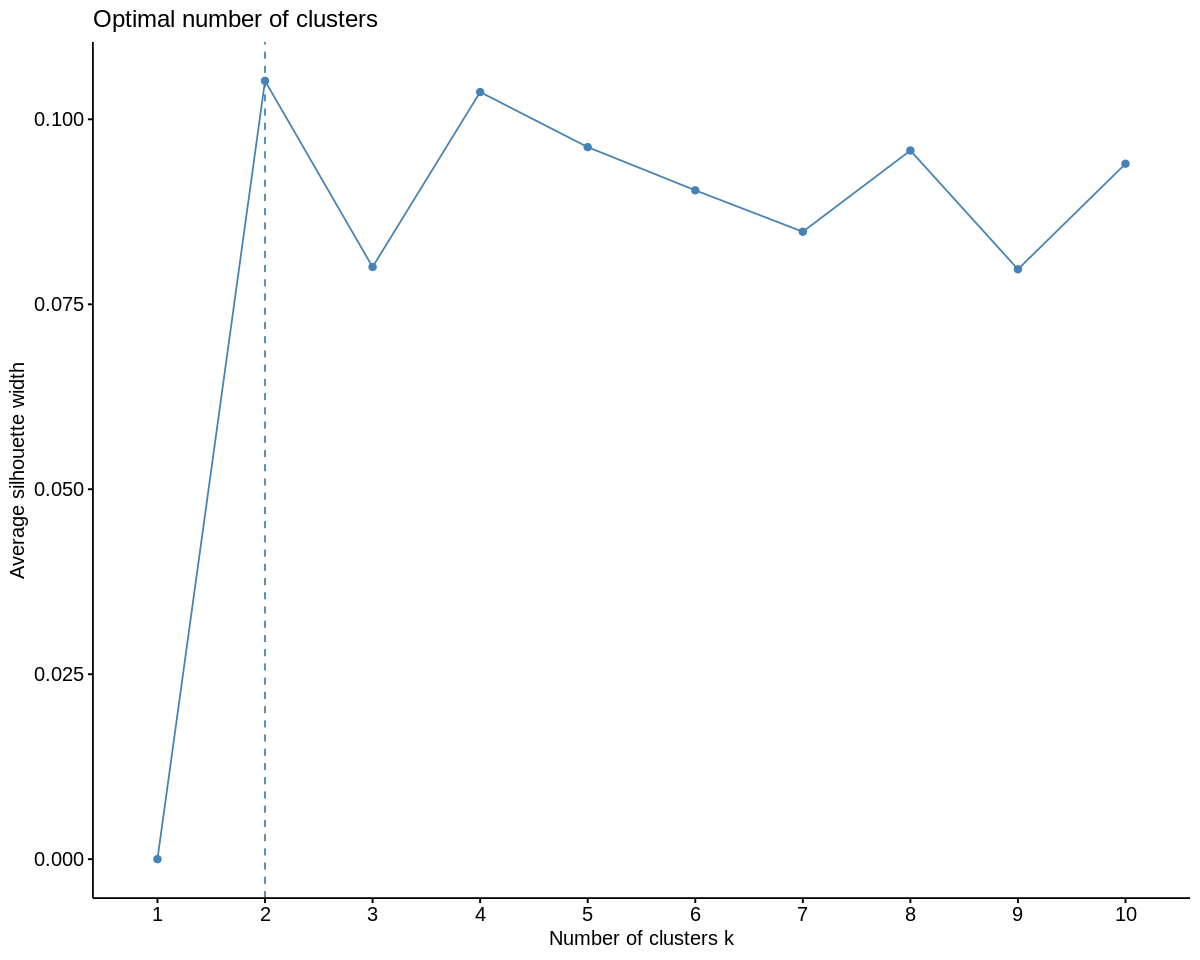

In [105]:
# use silhouette method to find the oprimal number of clusters
set.seed(25)
fviz_nbclust(data_norm, FUN = kmeans, method = "silhouette")

In [106]:
# apply the K-means clustering algorithm with no. of centroids(k)=4
result<- kmeans(data_norm, 2, nstart = 25) 

# check the number of records in each cluster
result$size

[1] 9547 2571

In [107]:
# view the cluster center datapoints by each attribute
result$centers

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,⋯,traffictype.15,traffictype.16,traffictype.17,traffictype.18,traffictype.19,traffictype.20,visitortypeNew_Visitor,visitortypeReturning_Visitor,weekend.FALSE,weekend.TRUE
1,0.08852888,0.02441004,0.02170403,0.01481089,0.04860983,0.02026956,0.09676651,0.2021862,0.01642786,0.06496282,⋯,0.001256939,0.0003142348,0.0000000000,0.001047449,0.001466429,0.01225516,0.1348067,0.8651933,0.7794071,0.2205929
2,0.08068629,0.02413322,0.01975561,0.01151186,0.03467481,0.01406929,0.12093908,0.2247769,0.01540744,0.05281991,⋯,0.009334889,0.0000000000,0.0003889537,0.000000000,0.001166861,0.01089070,0.1579152,0.8420848,0.7110074,0.2889926


In [108]:
# get the cluster vector that shows the cluster where each record falls
result$cluster

[1] 2 1 2 1 1 1 1 1 1 1 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1
   [37] 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1
   [73] 1 1 1 1 1 1 2 2 2 2 1 1 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 1 1 2 2 1 2 2 2 2
  [109] 1 1 1 1 2 1 2 2 1 1 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1
  [145] 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 1 1 1 2 1 2 2 1 2 2 2 2 1 1
  [181] 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [217] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1
  [253] 1 2 1 2 2 1 2 1 1 1 1 1 2 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2
  [289] 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1
  [325] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [361] 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 2 2 2 1 1
  [397] 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [433] 1 1 1 1 1 1 1 1 2 2 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
  [469] 2 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
  [505] 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
  [541] 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1
  [577] 2 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 2 2 2 1
  [613] 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2
  [649] 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1
  [685] 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 2 1 2 2 2 1 2 1 2
  [721] 1 1 2 2 1 2 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1
  [757] 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1 2 1 1 2 1 1 2 2 1 1 1
  [793] 2 2 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1
  [829] 1 2 2 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1
  [865] 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
  [901] 1 1 2 2 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2
  [937] 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 2 2 2 1 2 1 2 1 1 1 1 2 2 2 1 1 1 1
  [973] 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1009] 2 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1
 [1045] 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1
 [1081] 2 2 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 1
 [1117] 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 1 2 2 1 1 1 1 2 2 1 1
 [1153] 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2
 [1189] 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1
 [1225] 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1
 [1261] 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 [1297] 1 1 2 1 2 1 2 2 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 2 2 1 1 1
 [1333] 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1
 [1369] 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 1
 [1405] 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1
 [1441] 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1
 [1477] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 2 2
 [1513] 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1
 [1549] 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 [1585] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 [1621] 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 [1657] 1 2 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1
 [1693] 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 [1729] 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 [1765] 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 [18

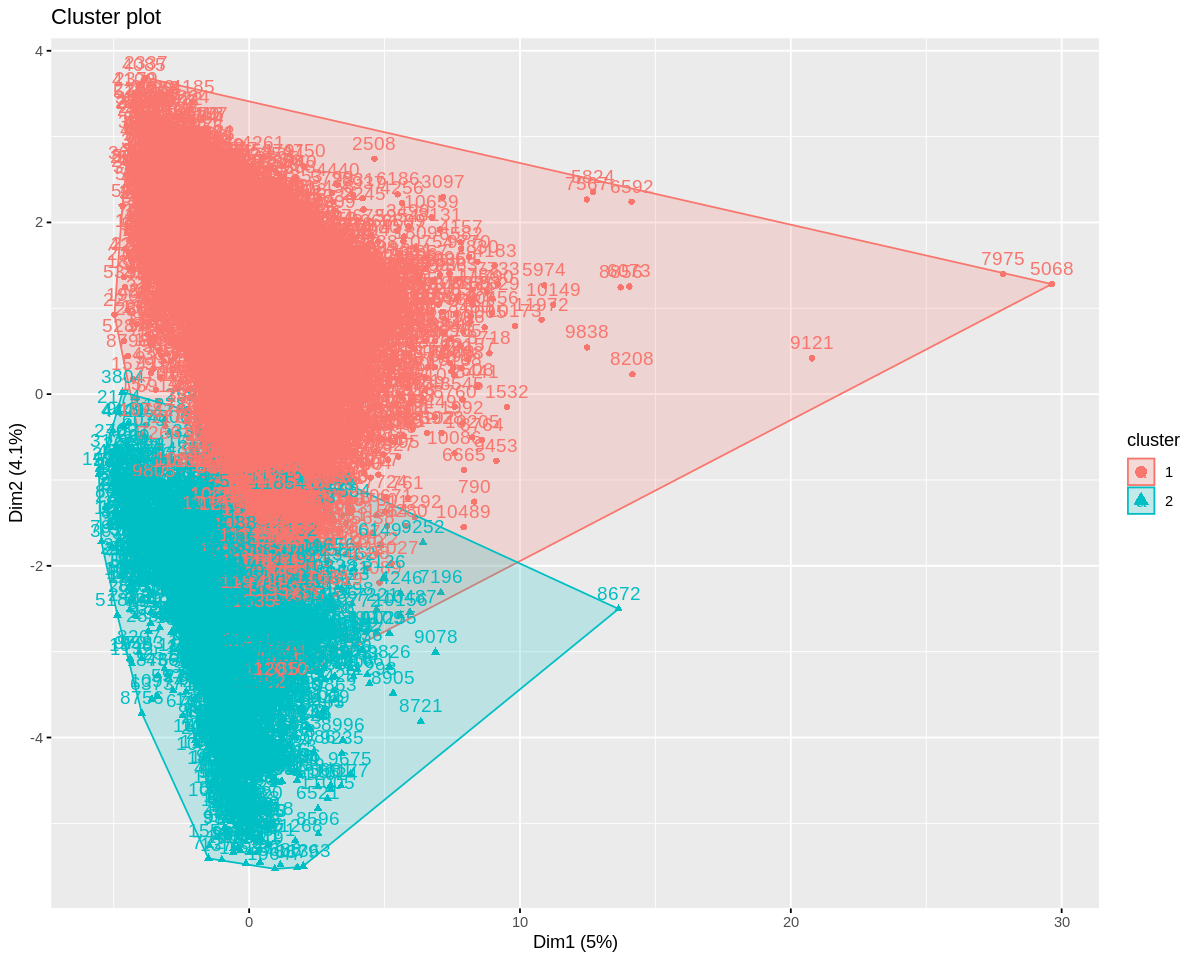

In [109]:
# visualize the clusters
fviz_cluster(result, data = data_norm)


In [110]:
# check the distribution of the classes ('revenue') in the different classes
table(result$cluster, data$revenue)

   
    FALSE TRUE
  1  8043 1504
  2  2183  388

The results show that the model correctly clustered 84.25% of the non-revenue generating visitors and only 13.15% of the revenue generating visitors

## Challenging the solution

### Hierarchical clustering

In [166]:
# use the dist() function to compute the Euclidean distance between observations, 
# d will be the first argument in the hclust() function dissimilarity matrix
d <- dist(data_norm, method = "euclidean") # using the normalized data instead of scaling the data

In [167]:
# perform hierarchical clustering using the Ward's method

res.hc <- hclust(d, method = "ward.D2" )

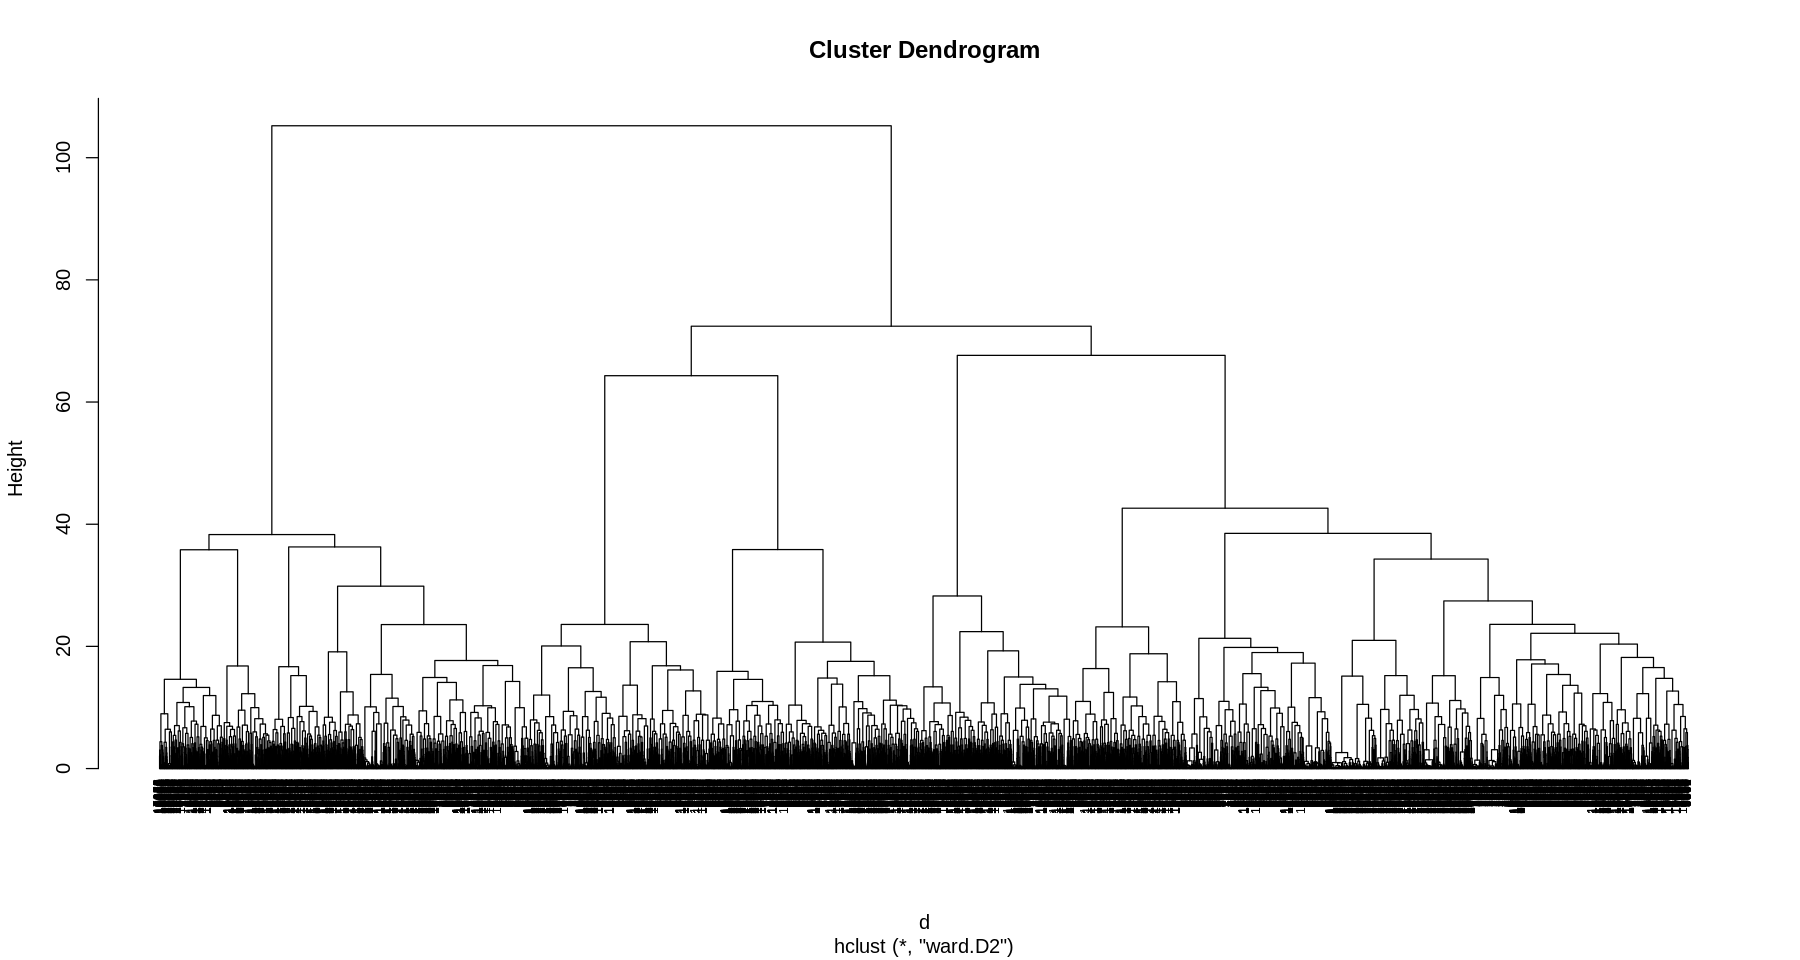

In [168]:
# plot the obtained dendrogram
options(repr.plot.width = 15, repr.plot.height = 8)

plot(res.hc, cex = 0.6, hang = -1)

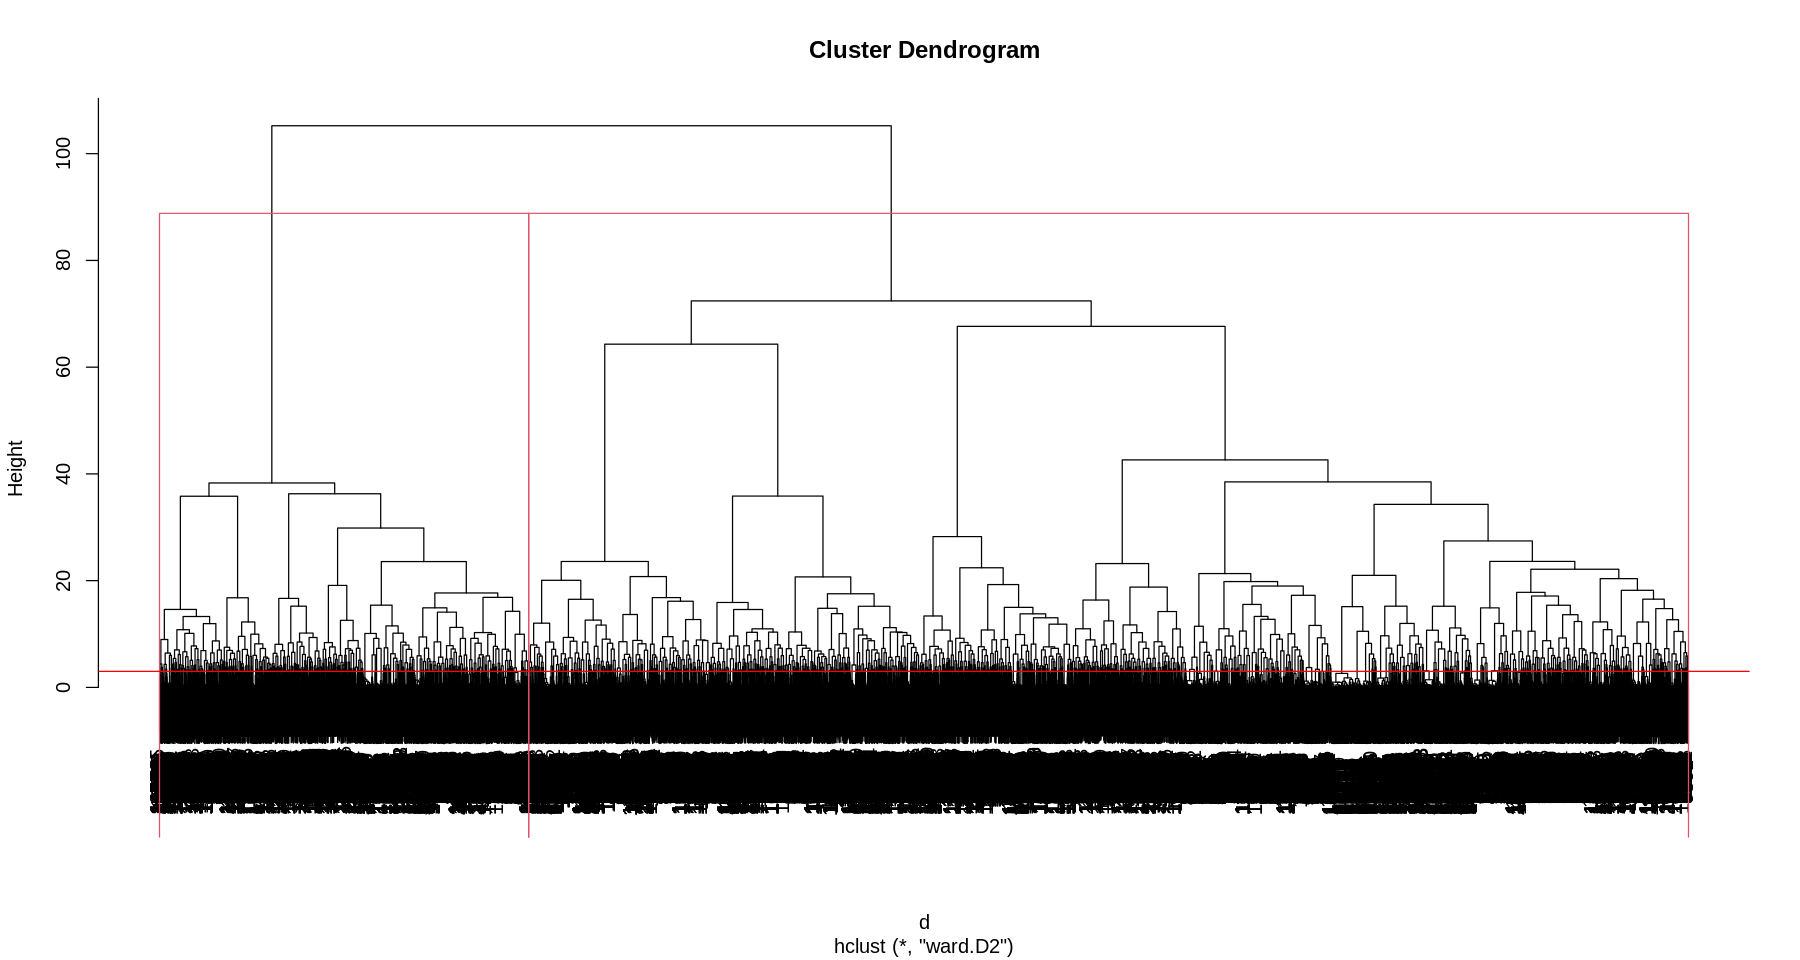

In [169]:
# see the clusters on the dendrogram using R's abline() function to draw the cut line and 
# superimpose rectangular compartments for each cluster on the tree with the rect.hclust() function
plot(res.hc)
rect.hclust(res.hc , k = 2)
abline(h = 3, col = 'red')

It is clear that one cluster has more records than the other one

In [170]:
# find the number of records in each cluster 
cut <- cutree(res.hc, k = 2)
table (cut)

cut
   1    2 
2926 9192 

In [171]:
# check the distribution of the classes ('revenue') in the different classes
table(cut, data$revenue)

   
cut FALSE TRUE
  1  2486  440
  2  7740 1452

The results show that the model correctly clustered 84.2% of the non-revenue generating visitors and only 15.04% of the revenue generating visitors

## Conclusions
Both the hierarchical and K-Means clustering models failed to cluster the revenue generating visitors correctly; this could be attributed to the major class imbalance in the data set. Nonetheless, the hierarchical clustering model perfomed better than the K-Means model 

## Recommendation
Dimensionality reduction should be done in order to improve the performance of the models